# Initial Encodings

In [ ]:
dtypes={'ProductName': 'float32', 'EngineVersion': 'float32', 'AppVersion': 'float32', 'AvSigVersion': 'float32', 'IsBeta': 'float32', 'RtpStateBitfield': 'float32', 'IsSxsPassiveMode': 'float32', 'DefaultBrowsersIdentifier': 'float32', 'AVProductStatesIdentifier': 'float32', 'AVProductsInstalled': 'float32', 'AVProductsEnabled': 'float32', 'HasTpm': 'float32', 'CountryIdentifier': 'float32', 'CityIdentifier': 'float32', 'OrganizationIdentifier': 'float32', 'GeoNameIdentifier': 'float32', 'LocaleEnglishNameIdentifier': 'float32', 'Platform': 'float32', 'Processor': 'float32', 'OsVer': 'float32', 'OsBuild': 'float32', 'OsSuite': 'float32', 'OsPlatformSubRelease': 'float32', 'OsBuildLab': 'float32', 'SkuEdition': 'float32', 'IsProtected': 'float32', 'AutoSampleOptIn': 'float32', 'PuaMode': 'float32', 'SMode': 'float32', 'IeVerIdentifier': 'float32', 'SmartScreen': 'float32', 'Firewall': 'float32', 'UacLuaenable': 'float32', 'Census_MDC2FormFactor': 'float32', 'Census_DeviceFamily': 'float32', 'Census_OEMNameIdentifier': 'float32', 'Census_OEMModelIdentifier': 'float32', 'Census_ProcessorCoreCount': 'float32', 'Census_ProcessorManufacturerIdentifier': 'float32', 'Census_ProcessorModelIdentifier': 'float32', 'Census_ProcessorClass': 'float32', 'Census_PrimaryDiskTotalCapacity': 'float32', 'Census_PrimaryDiskTypeName': 'float32', 'Census_SystemVolumeTotalCapacity': 'float32', 'Census_HasOpticalDiskDrive': 'float32', 'Census_TotalPhysicalRAM': 'float32', 'Census_ChassisTypeName': 'float32', 'Census_InternalPrimaryDiagonalDisplaySizeInInches': 'float32', 'Census_InternalPrimaryDisplayResolutionHorizontal': 'float32', 'Census_InternalPrimaryDisplayResolutionVertical': 'float32', 'Census_PowerPlatformRoleName': 'float32', 'Census_InternalBatteryType': 'float32', 'Census_InternalBatteryNumberOfCharges': 'float32', 'Census_OSVersion': 'float32', 'Census_OSArchitecture': 'float32', 'Census_OSBranch': 'float32', 'Census_OSBuildNumber': 'float32', 'Census_OSBuildRevision': 'float32', 'Census_OSEdition': 'float32', 'Census_OSSkuName': 'float32', 'Census_OSInstallTypeName': 'float32', 'Census_OSInstallLanguageIdentifier': 'float32', 'Census_OSUILocaleIdentifier': 'float32', 'Census_OSWUAutoUpdateOptionsName': 'float32', 'Census_IsPortableOperatingSystem': 'float32', 'Census_GenuineStateName': 'float32', 'Census_ActivationChannel': 'float32', 'Census_IsFlightingInternal': 'float32', 'Census_IsFlightsDisabled': 'float32', 'Census_FlightRing': 'float32', 'Census_ThresholdOptIn': 'float32', 'Census_FirmwareManufacturerIdentifier': 'float32', 'Census_FirmwareVersionIdentifier': 'float32', 'Census_IsSecureBootEnabled': 'float32', 'Census_IsWIMBootEnabled': 'float32', 'Census_IsVirtualDevice': 'float32', 'Census_IsTouchEnabled': 'float32', 'Census_IsPenCapable': 'float32', 'Census_IsAlwaysOnAlwaysConnectedCapable': 'float32', 'Wdft_IsGamer': 'float32', 'Wdft_RegionIdentifier': 'float32', 'HasDetections': 'int8'}

#local copy of the processed dataset made using Encode Datasets\Encoder pickle Files\Initial Encodings
train_dir=r"C:\Users\jithi\OneDrive\Desktop\ML project\Processed Datasets\train_data_scaled_encoded_shrunk.csv"
valid_dir=r'C:\Users\jithi\OneDrive\Desktop\ML project\Processed Datasets\validation_data_scaled_encoded_shrunk.csv'

In [2]:
import pandas as pd
train = pd.read_csv(train_dir, dtype=dtypes)
valid = pd.read_csv(valid_dir, dtype=dtypes)

X_train = train.drop(columns=['HasDetections'])
y_train = train['HasDetections']
X_valid = valid.drop(columns=['HasDetections'])
y_valid = valid['HasDetections']


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from tqdm import tqdm
from torch.utils.data import DataLoader, TensorDataset
import helper_functions
import importlib
import os

importlib.reload(helper_functions)
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_valid.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_valid.values, dtype=torch.float32).view(-1, 1)

#to gpu
if torch.cuda.is_available():
    device = torch.device("cuda")
    X_train_tensor = X_train_tensor.to(device)
    y_train_tensor = y_train_tensor.to(device)
    X_test_tensor = X_test_tensor.to(device)
    y_test_tensor = y_test_tensor.to(device)


class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        
        self.model = nn.Sequential(
            nn.Linear(X_train_tensor.shape[1], 256), 
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),                            
            
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(64, 1) 
        )

    def forward(self, x):
        return self.model(x)

model = MLP()

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), weight_decay=1e-4,lr=0.0001)  

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
batch_size = 2048
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2)  


### Without Feature Selection

In [ ]:
num_epochs = 100
best_model_weights, train_loss, test_loss, train_accuracy, test_accuracy, lrs = helper_functions.train_and_evaluate_model(model, criterion, optimizer, scheduler, train_loader, test_loader, num_epochs)
torch.save(model.state_dict(), '2hl_initial_encodings.pth')

Epoch 1/100 - LR: 0.000100: 100%|██████████| 3485/3485 [02:18<00:00, 25.15it/s, acc=62.47%, loss=0.6416]


Epoch 1 Loss: 0.6568, Train Accuracy: 60.64%
Test Loss: 0.6433, Test Accuracy: 62.08%


Epoch 2/100 - LR: 0.000100: 100%|██████████| 3485/3485 [02:45<00:00, 21.07it/s, acc=62.26%, loss=0.6314]


Epoch 2 Loss: 0.6402, Train Accuracy: 62.40%
Test Loss: 0.6370, Test Accuracy: 62.67%


Epoch 3/100 - LR: 0.000100: 100%|██████████| 3485/3485 [02:49<00:00, 20.52it/s, acc=63.65%, loss=0.6317]


Epoch 3 Loss: 0.6346, Train Accuracy: 62.98%
Test Loss: 0.6343, Test Accuracy: 62.81%


Epoch 4/100 - LR: 0.000100: 100%|██████████| 3485/3485 [02:51<00:00, 20.27it/s, acc=65.28%, loss=0.6290]


Epoch 4 Loss: 0.6317, Train Accuracy: 63.29%
Test Loss: 0.6325, Test Accuracy: 62.95%


Epoch 5/100 - LR: 0.000100: 100%|██████████| 3485/3485 [03:00<00:00, 19.29it/s, acc=65.44%, loss=0.6194]


Epoch 5 Loss: 0.6300, Train Accuracy: 63.51%
Test Loss: 0.6319, Test Accuracy: 62.90%


Epoch 6/100 - LR: 0.000100: 100%|██████████| 3485/3485 [02:46<00:00, 20.88it/s, acc=62.98%, loss=0.6365]


Epoch 6 Loss: 0.6286, Train Accuracy: 63.65%
Test Loss: 0.6316, Test Accuracy: 62.84%


Epoch 7/100 - LR: 0.000100: 100%|██████████| 3485/3485 [02:48<00:00, 20.64it/s, acc=64.16%, loss=0.6209]


Epoch 7 Loss: 0.6275, Train Accuracy: 63.80%
Test Loss: 0.6318, Test Accuracy: 62.81%


Epoch 8/100 - LR: 0.000100: 100%|██████████| 3485/3485 [02:46<00:00, 20.89it/s, acc=64.31%, loss=0.6174]


Epoch 8 Loss: 0.6265, Train Accuracy: 63.91%
Test Loss: 0.6327, Test Accuracy: 62.56%


Epoch 9/100 - LR: 0.000100: 100%|██████████| 3485/3485 [02:45<00:00, 21.00it/s, acc=63.49%, loss=0.6249]


Epoch 9 Loss: 0.6256, Train Accuracy: 64.04%
Test Loss: 0.6335, Test Accuracy: 62.41%
Learning rate changed from 0.000100 to 0.000050


Epoch 10/100 - LR: 0.000050: 100%|██████████| 3485/3485 [02:47<00:00, 20.77it/s, acc=65.08%, loss=0.6224]


Epoch 10 Loss: 0.6246, Train Accuracy: 64.16%
Test Loss: 0.6347, Test Accuracy: 62.23%


Epoch 11/100 - LR: 0.000050: 100%|██████████| 3485/3485 [02:47<00:00, 20.79it/s, acc=67.84%, loss=0.6010]


Epoch 11 Loss: 0.6242, Train Accuracy: 64.22%
Test Loss: 0.6348, Test Accuracy: 62.16%


Epoch 12/100 - LR: 0.000050: 100%|██████████| 3485/3485 [02:44<00:00, 21.16it/s, acc=64.77%, loss=0.6192]


Epoch 12 Loss: 0.6238, Train Accuracy: 64.28%
Test Loss: 0.6351, Test Accuracy: 62.14%
Learning rate changed from 0.000050 to 0.000025


Epoch 13/100 - LR: 0.000025: 100%|██████████| 3485/3485 [02:52<00:00, 20.18it/s, acc=64.72%, loss=0.6169]


Epoch 13 Loss: 0.6234, Train Accuracy: 64.33%
Test Loss: 0.6351, Test Accuracy: 62.11%


Epoch 14/100 - LR: 0.000025: 100%|██████████| 3485/3485 [02:22<00:00, 24.53it/s, acc=64.06%, loss=0.6262]


Epoch 14 Loss: 0.6231, Train Accuracy: 64.35%
Test Loss: 0.6350, Test Accuracy: 62.15%


Epoch 15/100 - LR: 0.000025: 100%|██████████| 3485/3485 [02:56<00:00, 19.77it/s, acc=64.21%, loss=0.6258]


Epoch 15 Loss: 0.6229, Train Accuracy: 64.39%
Test Loss: 0.6345, Test Accuracy: 62.18%
Learning rate changed from 0.000025 to 0.000013
Early stopping triggered at epoch 15. Best model was from epoch 4.


### Using PCA for feature selection

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from tqdm import tqdm
from torch.utils.data import DataLoader, TensorDataset
import helper_functions
import importlib
import os

pca_features = [
    "Census_OSBuildNumber",
    "OsBuild",
    "Census_InternalBatteryType",
    "Census_InternalBatteryNumberOfCharges",
    "Census_IsWIMBootEnabled",
    "Census_ThresholdOptIn",
    "OsVer",
    "Platform",
    "Census_ChassisTypeName",
    "Census_MDC2FormFactor",
    "Census_InternalPrimaryDisplayResolutionVertical",
    "Census_OSSkuName",
    "AppVersion",
    "Census_OSEdition",
    "OsSuite",
    "Census_InternalPrimaryDisplayResolutionHorizontal",
    "Census_InternalPrimaryDiagonalDisplaySizeInInches",
    "SkuEdition",
    "OsBuildLab",
    "Census_OSVersion",
    "SmartScreen",
    "Census_TotalPhysicalRAM",
    "Census_OSBranch",
    "Census_PowerPlatformRoleName",
    "ProductName",
    "Census_IsFlightingInternal",
    "HasTpm",
    "Census_ProcessorCoreCount",
    "Census_OSBuildRevision",
    "OsPlatformSubRelease",
    "Census_IsFlightsDisabled",
    "Census_FirmwareManufacturerIdentifier",
    "Census_IsSecureBootEnabled",
    "Firewall",
    "Census_FlightRing",
    "Census_PrimaryDiskTypeName",
    "EngineVersion",
    "IeVerIdentifier",
    "Census_ProcessorModelIdentifier",
    "Census_FirmwareVersionIdentifier",
    "Census_ProcessorClass",
    "AVProductsInstalled",
    "Wdft_IsGamer",
    "Census_OEMNameIdentifier",
    "IsProtected",
    "Processor",
    "Census_OSArchitecture",
    "AVProductStatesIdentifier",
    "SMode",
    "Census_OEMModelIdentifier",
    "Wdft_RegionIdentifier",
    "Census_OSInstallLanguageIdentifier",
    "DefaultBrowsersIdentifier",
    "AVProductsEnabled",
    "Census_GenuineStateName",
    "AvSigVersion",
    "Census_OSWUAutoUpdateOptionsName"
]
# Make sure these exist
assert 'X_train' in locals() and 'y_train' in locals()

# Convert tensors and push to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train_pca_tensor = torch.tensor(X_train[pca_features].values, dtype=torch.float32).to(device)
X_valid_pca_tensor = torch.tensor(X_valid[pca_features].values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1).to(device)
y_test_tensor = torch.tensor(y_valid.values, dtype=torch.float32).view(-1, 1).to(device)

# DataLoader
train_dataset_pca = TensorDataset(X_train_pca_tensor, y_train_tensor)
valid_dataset_pca = TensorDataset(X_valid_pca_tensor, y_test_tensor)
train_loader_pca = DataLoader(train_dataset_pca, batch_size=2048, shuffle=True)
test_loader_pca = DataLoader(valid_dataset_pca, batch_size=2048, shuffle=False)

# Model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(X_train_pca_tensor.shape[1], 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
              # Add this only if using BCELoss
        )

    def forward(self, x):
        return self.model(x)



model_pca = MLP().to(device)

criterion = nn.BCEWithLogitsLoss()  # or use nn.BCEWithLogitsLoss and remove sigmoid
optimizer = optim.Adam(model_pca.parameters(), weight_decay=1e-4, lr=0.0001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2)

# Train
best_model_weights_pca, train_loss_pca, test_loss_pca, train_accuracy_pca, test_accuracy_pca, lrs_pca = helper_functions.train_and_evaluate_model(
    model_pca, criterion, optimizer, scheduler, train_loader_pca, test_loader_pca, epochs=100
)




Epoch 1/100 - LR: 0.000100: 100%|██████████| 3485/3485 [02:35<00:00, 22.40it/s, acc=62.26%, loss=0.6380]


Epoch 1 Loss: 0.6624, Train Accuracy: 59.86%
Test Loss: 0.6466, Test Accuracy: 61.79%


Epoch 2/100 - LR: 0.000100: 100%|██████████| 3485/3485 [02:43<00:00, 21.31it/s, acc=61.70%, loss=0.6439]


Epoch 2 Loss: 0.6440, Train Accuracy: 61.93%
Test Loss: 0.6405, Test Accuracy: 62.12%


Epoch 3/100 - LR: 0.000100: 100%|██████████| 3485/3485 [02:48<00:00, 20.68it/s, acc=62.93%, loss=0.6342]


Epoch 3 Loss: 0.6379, Train Accuracy: 62.61%
Test Loss: 0.6384, Test Accuracy: 62.20%


Epoch 4/100 - LR: 0.000100: 100%|██████████| 3485/3485 [02:51<00:00, 20.33it/s, acc=63.18%, loss=0.6295]


Epoch 4 Loss: 0.6350, Train Accuracy: 62.90%
Test Loss: 0.6373, Test Accuracy: 62.16%


Epoch 5/100 - LR: 0.000100: 100%|██████████| 3485/3485 [02:52<00:00, 20.25it/s, acc=64.16%, loss=0.6285]


Epoch 5 Loss: 0.6333, Train Accuracy: 63.09%
Test Loss: 0.6370, Test Accuracy: 62.12%


Epoch 6/100 - LR: 0.000100: 100%|██████████| 3485/3485 [02:59<00:00, 19.47it/s, acc=64.67%, loss=0.6268]


Epoch 6 Loss: 0.6320, Train Accuracy: 63.26%
Test Loss: 0.6375, Test Accuracy: 61.93%


Epoch 7/100 - LR: 0.000100: 100%|██████████| 3485/3485 [03:02<00:00, 19.09it/s, acc=61.50%, loss=0.6422]


Epoch 7 Loss: 0.6310, Train Accuracy: 63.38%
Test Loss: 0.6386, Test Accuracy: 61.62%


Epoch 8/100 - LR: 0.000100: 100%|██████████| 3485/3485 [03:01<00:00, 19.16it/s, acc=64.00%, loss=0.6347]


Epoch 8 Loss: 0.6302, Train Accuracy: 63.50%
Test Loss: 0.6409, Test Accuracy: 61.38%
Learning rate changed from 0.000100 to 0.000050


Epoch 9/100 - LR: 0.000050: 100%|██████████| 3485/3485 [03:08<00:00, 18.46it/s, acc=64.26%, loss=0.6195]


Epoch 9 Loss: 0.6293, Train Accuracy: 63.61%
Test Loss: 0.6434, Test Accuracy: 61.03%


Epoch 10/100 - LR: 0.000050: 100%|██████████| 3485/3485 [02:44<00:00, 21.24it/s, acc=64.26%, loss=0.6251]


Epoch 10 Loss: 0.6288, Train Accuracy: 63.68%
Test Loss: 0.6436, Test Accuracy: 61.00%


Epoch 11/100 - LR: 0.000050: 100%|██████████| 3485/3485 [03:07<00:00, 18.62it/s, acc=64.77%, loss=0.6248]


Epoch 11 Loss: 0.6284, Train Accuracy: 63.74%
Test Loss: 0.6450, Test Accuracy: 60.82%
Learning rate changed from 0.000050 to 0.000025


Epoch 12/100 - LR: 0.000025: 100%|██████████| 3485/3485 [03:05<00:00, 18.74it/s, acc=63.54%, loss=0.6381]


Epoch 12 Loss: 0.6279, Train Accuracy: 63.81%
Test Loss: 0.6451, Test Accuracy: 60.83%


Epoch 13/100 - LR: 0.000025: 100%|██████████| 3485/3485 [03:02<00:00, 19.06it/s, acc=64.36%, loss=0.6192]


Epoch 13 Loss: 0.6277, Train Accuracy: 63.83%
Test Loss: 0.6453, Test Accuracy: 60.82%


Epoch 14/100 - LR: 0.000025: 100%|██████████| 3485/3485 [02:54<00:00, 19.91it/s, acc=64.31%, loss=0.6269]


Epoch 14 Loss: 0.6275, Train Accuracy: 63.86%
Test Loss: 0.6456, Test Accuracy: 60.78%
Learning rate changed from 0.000025 to 0.000013
Early stopping triggered at epoch 14. Best model was from epoch 3.


### Using LDA for feature selection

In [19]:
import torch
torch.cuda.empty_cache()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from tqdm import tqdm
from torch.utils.data import DataLoader, TensorDataset
import helper_functions
import os

# Use CUDA blocking for better traceback during errors

lda_features = [
    'Census_OSEdition', 'Census_OSSkuName', 'AVProductsInstalled', 'EngineVersion', 'SmartScreen',
    'AVProductStatesIdentifier', 'Census_ThresholdOptIn', 'IsProtected', 'Census_OSInstallTypeName',
    'Census_IsVirtualDevice', 'Census_InternalPrimaryDisplayResolutionVertical', 'OsSuite',
    'Census_InternalPrimaryDisplayResolutionHorizontal', 'Processor',
    'Census_IsAlwaysOnAlwaysConnectedCapable', 'Wdft_IsGamer', 'Census_OSVersion',
    'Census_OSUILocaleIdentifier', 'Census_InternalBatteryNumberOfCharges', 'Census_IsTouchEnabled',
    'Census_OSBuildNumber', 'HasTpm', 'SMode', 'Census_MDC2FormFactor',
    'Census_OSInstallLanguageIdentifier', 'Census_DeviceFamily', 'Census_HasOpticalDiskDrive',
    'Census_TotalPhysicalRAM', 'Census_InternalBatteryType', 'Census_PrimaryDiskTypeName',
    'LocaleEnglishNameIdentifier', 'ProductName', 'Census_ProcessorCoreCount', 'Wdft_RegionIdentifier',
    'DefaultBrowsersIdentifier', 'Census_IsSecureBootEnabled', 'Census_GenuineStateName',
    'RtpStateBitfield', 'OsBuild', 'SkuEdition', 'OsPlatformSubRelease', 'Census_IsFlightingInternal',
    'Census_FlightRing', 'OsVer', 'Census_ProcessorModelIdentifier', 'Census_ActivationChannel',
    'IeVerIdentifier', 'Census_OSBuildRevision', 'AvSigVersion', 'AppVersion',
    'Census_OSWUAutoUpdateOptionsName', 'Census_OEMNameIdentifier', 'Census_OSArchitecture',
    'Census_ChassisTypeName', 'Census_PowerPlatformRoleName', 'PuaMode', 'Census_OEMModelIdentifier',
    'Census_ProcessorClass', 'Census_ProcessorManufacturerIdentifier', 'Census_IsFlightsDisabled',
    'Census_OSBranch', 'AVProductsEnabled', 'Census_SystemVolumeTotalCapacity', 'CityIdentifier',
    'Census_IsPortableOperatingSystem', 'IsSxsPassiveMode', 'Census_FirmwareManufacturerIdentifier',
    'OrganizationIdentifier', 'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'AutoSampleOptIn',
    'OsBuildLab', 'Census_FirmwareVersionIdentifier', 'CountryIdentifier', 'UacLuaenable', 'IsBeta',
    'Firewall', 'Census_IsPenCapable', 'Census_PrimaryDiskTotalCapacity', 'Platform',
    'Census_IsWIMBootEnabled', 'GeoNameIdentifier'
]

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Convert tensors
X_train_lda_tensor = torch.tensor(X_train[lda_features].values, dtype=torch.float32).to(device)
X_valid_lda_tensor = torch.tensor(X_valid[lda_features].values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1).to(device)
y_test_tensor = torch.tensor(y_valid.values, dtype=torch.float32).view(-1, 1).to(device)

# Datasets & Loaders
train_dataset_lda = TensorDataset(X_train_lda_tensor, y_train_tensor)
valid_dataset_lda = TensorDataset(X_valid_lda_tensor, y_test_tensor)

batch_size = 2048
train_loader_lda = DataLoader(train_dataset_lda, batch_size=batch_size, shuffle=True)
test_loader_lda = DataLoader(valid_dataset_lda, batch_size=batch_size, shuffle=False)

# MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(X_train_lda_tensor.shape[1], 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1)  # Do not add sigmoid if using BCEWithLogitsLoss
        )

    def forward(self, x):
        return self.model(x)

# Training setup
model_lda = MLP().to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model_lda.parameters(), weight_decay=1e-4, lr=0.0001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2)

# Train & evaluate
num_epochs = 100
best_model_weights_lda, train_loss_lda, test_loss_lda, train_accuracy_lda, test_accuracy_lda, lrs_lda = helper_functions.train_and_evaluate_model(
    model_lda, criterion, optimizer, scheduler, train_loader_lda, test_loader_lda, num_epochs
)

# Save model
torch.save(model_lda.state_dict(), '2hl_initial_encodings_lda.pth')


Epoch 1/100 - LR: 0.000100: 100%|██████████| 3485/3485 [02:17<00:00, 25.41it/s, acc=61.44%, loss=0.6501]


Epoch 1 Loss: 0.6605, Train Accuracy: 60.11%
Test Loss: 0.6449, Test Accuracy: 61.83%


Epoch 2/100 - LR: 0.000100: 100%|██████████| 3485/3485 [02:15<00:00, 25.67it/s, acc=64.11%, loss=0.6319]


Epoch 2 Loss: 0.6412, Train Accuracy: 62.27%
Test Loss: 0.6379, Test Accuracy: 62.55%


Epoch 3/100 - LR: 0.000100: 100%|██████████| 3485/3485 [02:15<00:00, 25.66it/s, acc=61.29%, loss=0.6436]


Epoch 3 Loss: 0.6349, Train Accuracy: 62.97%
Test Loss: 0.6346, Test Accuracy: 62.83%


Epoch 4/100 - LR: 0.000100: 100%|██████████| 3485/3485 [02:14<00:00, 25.83it/s, acc=62.06%, loss=0.6432]


Epoch 4 Loss: 0.6318, Train Accuracy: 63.29%
Test Loss: 0.6329, Test Accuracy: 62.94%


Epoch 5/100 - LR: 0.000100: 100%|██████████| 3485/3485 [02:15<00:00, 25.64it/s, acc=62.67%, loss=0.6339]


Epoch 5 Loss: 0.6300, Train Accuracy: 63.49%
Test Loss: 0.6320, Test Accuracy: 62.90%


Epoch 6/100 - LR: 0.000100: 100%|██████████| 3485/3485 [02:15<00:00, 25.74it/s, acc=63.75%, loss=0.6261]


Epoch 6 Loss: 0.6286, Train Accuracy: 63.66%
Test Loss: 0.6320, Test Accuracy: 62.73%


Epoch 7/100 - LR: 0.000100: 100%|██████████| 3485/3485 [02:14<00:00, 25.92it/s, acc=63.18%, loss=0.6276]


Epoch 7 Loss: 0.6275, Train Accuracy: 63.79%
Test Loss: 0.6326, Test Accuracy: 62.57%


Epoch 8/100 - LR: 0.000100: 100%|██████████| 3485/3485 [02:14<00:00, 25.83it/s, acc=62.98%, loss=0.6373]


Epoch 8 Loss: 0.6266, Train Accuracy: 63.92%
Test Loss: 0.6339, Test Accuracy: 62.30%
Learning rate changed from 0.000100 to 0.000050


Epoch 9/100 - LR: 0.000050: 100%|██████████| 3485/3485 [02:15<00:00, 25.72it/s, acc=63.49%, loss=0.6241]


Epoch 9 Loss: 0.6255, Train Accuracy: 64.06%
Test Loss: 0.6345, Test Accuracy: 62.19%


Epoch 10/100 - LR: 0.000050: 100%|██████████| 3485/3485 [02:15<00:00, 25.69it/s, acc=65.13%, loss=0.6176]


Epoch 10 Loss: 0.6250, Train Accuracy: 64.11%
Test Loss: 0.6359, Test Accuracy: 62.02%


Epoch 11/100 - LR: 0.000050: 100%|██████████| 3485/3485 [02:15<00:00, 25.68it/s, acc=63.70%, loss=0.6271]


Epoch 11 Loss: 0.6245, Train Accuracy: 64.18%
Test Loss: 0.6363, Test Accuracy: 61.93%
Learning rate changed from 0.000050 to 0.000025


Epoch 12/100 - LR: 0.000025: 100%|██████████| 3485/3485 [02:15<00:00, 25.74it/s, acc=65.18%, loss=0.6170]


Epoch 12 Loss: 0.6240, Train Accuracy: 64.24%
Test Loss: 0.6356, Test Accuracy: 62.04%


Epoch 13/100 - LR: 0.000025: 100%|██████████| 3485/3485 [02:16<00:00, 25.59it/s, acc=65.03%, loss=0.6256]


Epoch 13 Loss: 0.6238, Train Accuracy: 64.28%
Test Loss: 0.6359, Test Accuracy: 62.01%


Epoch 14/100 - LR: 0.000025: 100%|██████████| 3485/3485 [02:14<00:00, 25.85it/s, acc=65.64%, loss=0.6207]


Epoch 14 Loss: 0.6235, Train Accuracy: 64.30%
Test Loss: 0.6355, Test Accuracy: 62.04%
Learning rate changed from 0.000025 to 0.000013
Early stopping triggered at epoch 14. Best model was from epoch 4.


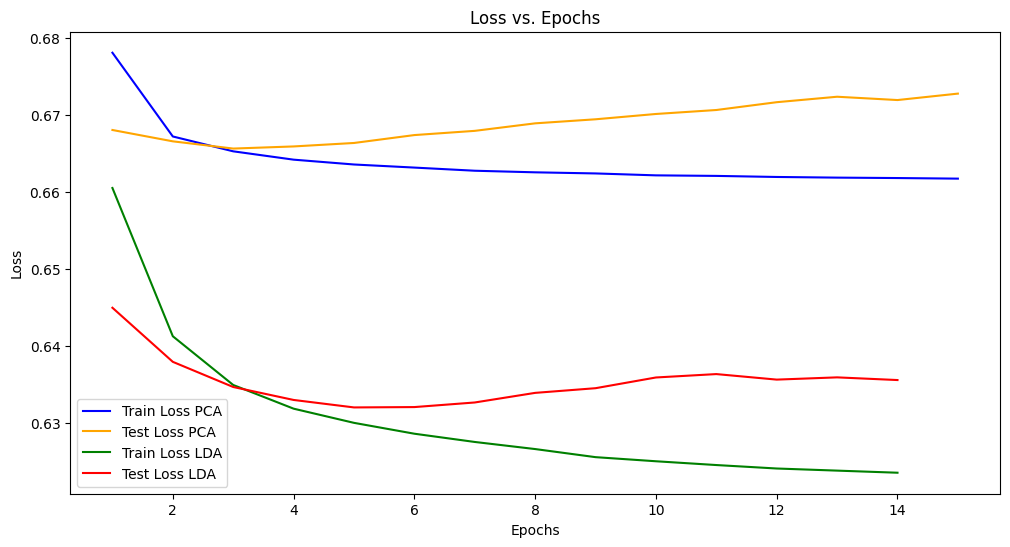

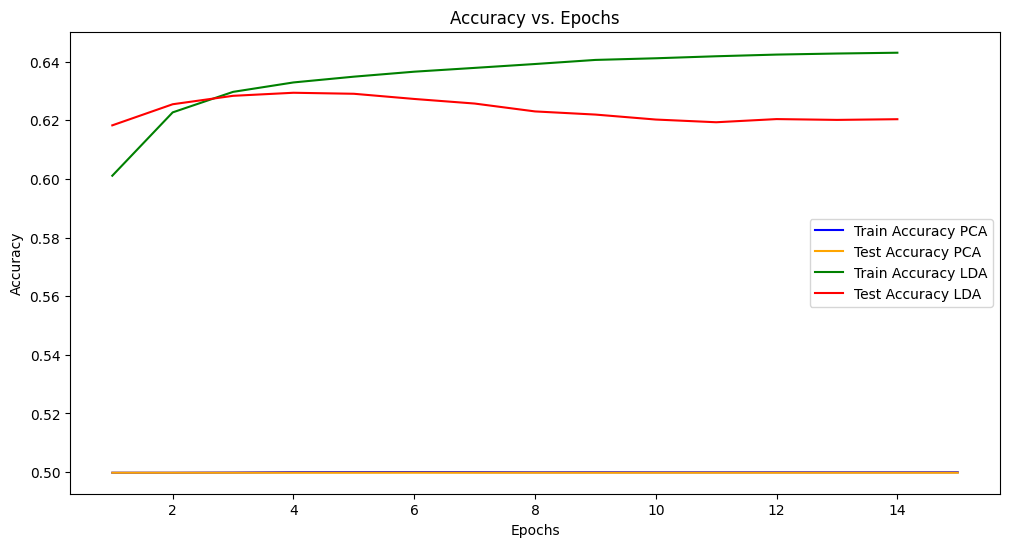

In [9]:
import matplotlib.pyplot as plt
import numpy as np


# Plotting function
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, len(train_loss_pca) + 1), train_loss_pca, label='Train Loss PCA', color='blue')
plt.plot(np.arange(1, len(test_loss_pca) + 1), test_loss_pca, label='Test Loss PCA', color='orange')
plt.plot(np.arange(1, len(train_loss_lda) + 1), train_loss_lda, label='Train Loss LDA', color='green')
plt.plot(np.arange(1, len(test_loss_lda) + 1), test_loss_lda, label='Test Loss LDA', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

# Plotting function for accuracy
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, len(train_accuracy_pca) + 1), train_accuracy_pca, label='Train Accuracy PCA', color='blue')   
plt.plot(np.arange(1, len(test_accuracy_pca) + 1), test_accuracy_pca, label='Test Accuracy PCA', color='orange')
plt.plot(np.arange(1, len(train_accuracy_lda) + 1), train_accuracy_lda, label='Train Accuracy LDA', color='green')
plt.plot(np.arange(1, len(test_accuracy_lda) + 1), test_accuracy_lda, label='Test Accuracy LDA', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.show()

# With Advanced Encodings

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from tqdm import tqdm
from torch.utils.data import DataLoader, TensorDataset
train_dtypes=test_dtypes=dtypes = {
    'ProductName':                                                  'float32',
    'IsBeta':                                                       'float32',
    'RtpStateBitfield':                                             'float32',
    'IsSxsPassiveMode':                                             'float32',
    'DefaultBrowsersIdentifier':                                    'float32',
    'AVProductStatesIdentifier':                                    'float32',
    'AVProductsInstalled':                                          'float32',
    'AVProductsEnabled':                                            'float32',
    'HasTpm':                                                       'float32',
    'CountryIdentifier':                                            'float32',
    'CityIdentifier':                                               'float32',
    'OrganizationIdentifier':                                       'float32',
    'GeoNameIdentifier':                                            'float32',
    'LocaleEnglishNameIdentifier':                                  'float32',
    'Platform':                                                     'float32',
    'Processor':                                                    'float32',
    'OsVer':                                                        'float32',
    'OsBuild':                                                      'float32',
    'OsSuite':                                                      'float32',
    'OsPlatformSubRelease':                                         'float32',
    'OsBuildLab':                                                   'float32',
    'SkuEdition':                                                   'float32',
    'IsProtected':                                                  'float32',
    'AutoSampleOptIn':                                              'float32',
    'PuaMode':                                                      'float32',
    'SMode':                                                        'float32',
    'IeVerIdentifier':                                              'float32',
    'SmartScreen':                                                  'float32',
    'Firewall':                                                     'float32',
    'UacLuaenable':                                                 'float32',
    'Census_MDC2FormFactor':                                        'float32',
    'Census_DeviceFamily':                                          'float32',
    'Census_OEMNameIdentifier':                                     'float32',
    'Census_OEMModelIdentifier':                                    'float32',
    'Census_ProcessorCoreCount':                                    'float32',
    'Census_ProcessorManufacturerIdentifier':                       'float32',
    'Census_ProcessorModelIdentifier':                              'float32',
    'Census_ProcessorClass':                                        'float32',
    'Census_PrimaryDiskTotalCapacity':                              'float32',
    'Census_PrimaryDiskTypeName':                                   'float32',
    'Census_SystemVolumeTotalCapacity':                             'float32',
    'Census_HasOpticalDiskDrive':                                   'float32',
    'Census_TotalPhysicalRAM':                                      'float32',
    'Census_ChassisTypeName':                                       'float32',
    'Census_InternalPrimaryDiagonalDisplaySizeInInches':            'float32',
    'Census_InternalPrimaryDisplayResolutionHorizontal':            'float32',
    'Census_InternalPrimaryDisplayResolutionVertical':              'float32',
    'Census_PowerPlatformRoleName':                                 'float32',
    'Census_InternalBatteryType':                                   'float32',
    'Census_InternalBatteryNumberOfCharges':                        'float32',
    'Census_OSArchitecture':                                        'float32',
    'Census_OSBranch':                                              'float32',
    'Census_OSBuildNumber':                                         'float32',
    'Census_OSBuildRevision':                                       'float32',
    'Census_OSEdition':                                             'float32',
    'Census_OSSkuName':                                             'float32',
    'Census_OSInstallTypeName':                                     'float32',
    'Census_OSInstallLanguageIdentifier':                           'float32',
    'Census_OSUILocaleIdentifier':                                  'float32',
    'Census_OSWUAutoUpdateOptionsName':                             'float32',
    'Census_IsPortableOperatingSystem':                             'float32',
    'Census_GenuineStateName':                                      'float32',
    'Census_ActivationChannel':                                     'float32',
    'Census_IsFlightingInternal':                                   'float32',
    'Census_IsFlightsDisabled':                                     'float32',
    'Census_FlightRing':                                            'float32',
    'Census_ThresholdOptIn':                                        'float32',
    'Census_FirmwareManufacturerIdentifier':                        'float32',
    'Census_FirmwareVersionIdentifier':                             'float32',
    'Census_IsSecureBootEnabled':                                   'float32',
    'Census_IsWIMBootEnabled':                                      'float32',
    'Census_IsVirtualDevice':                                       'float32',
    'Census_IsTouchEnabled':                                        'float32',
    'Census_IsPenCapable':                                          'float32',
    'Census_IsAlwaysOnAlwaysConnectedCapable':                      'float32',
    'Wdft_IsGamer':                                                 'float32',
    'Wdft_RegionIdentifier':                                        'float32',
    'EngineVersion_1':                                              'int8',
    'EngineVersion_2':                                              'int8',
    'EngineVersion_3':                                              'float32',
    'EngineVersion_4':                                              'float32',
    'AppVersion_1':                                                 'int8',
    'AppVersion_2':                                                 'float32',
    'AppVersion_3':                                                 'float32',
    'AppVersion_4':                                                 'float32',
    'AvSigVersion_1':                                               'float32',
    'AvSigVersion_2':                                               'float32',
    'AvSigVersion_3':                                               'float32',
    'AvSigVersion_4':                                               'int8',
    'Census_OSVersion_1':                                           'float32',
    'Census_OSVersion_2':                                           'float32',
    'Census_OSVersion_3':                                           'float32',
    'Census_OSVersion_4':                                           'float32',
    'HasDetections':                                                'int8',
}


train_data = pd.read_csv(r'C:\Users\jithi\OneDrive\Desktop\ML project\Processed Datasets\train_data_advanced_processed.csv',dtype=train_dtypes)
test_data = pd.read_csv(r'C:\Users\jithi\OneDrive\Desktop\ML project\Processed Datasets\validation_data_advanced_processed.csv',dtype=test_dtypes)

X_train = train_data.drop('HasDetections', axis=1)
y_train = train_data['HasDetections']
X_valid = test_data.drop('HasDetections', axis=1)
y_valid = test_data['HasDetections']

del train_data, test_data
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_valid.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_valid.values, dtype=torch.float32).view(-1, 1)

 

### Without Feature Selection

In [ ]:
import helper_functions
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        
        self.model = nn.Sequential(
            nn.Linear(X_train_tensor.shape[1], 256), 
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),                            
            
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(64, 1) 
        )

    def forward(self, x):
        return self.model(x)
    

model = MLP()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), weight_decay=1e-4,lr=0.001) 
model.to(device)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
batch_size = 4096
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2)  

num_epochs = 100
best_model_weights, shallow_train_loss, shallow_test_loss, shallow_train_accuracy, shallow_test_accuracy, lrs = helper_functions.train_and_evaluate_model(model, criterion, optimizer, scheduler, train_loader, test_loader, num_epochs)

torch.save(best_model_weights, '2hl_advanced_encodings.pth')


Epoch 1/100 - LR: 0.001000:   0%|          | 0/1743 [00:00<?, ?it/s]

Epoch 1/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:09<00:00,  9.20it/s, acc=63.88%, loss=0.6292]


Epoch 1 Loss: 0.6393, Train Accuracy: 62.57%
Test Loss: 0.6263, Test Accuracy: 63.85%


Epoch 2/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:12<00:00,  9.04it/s, acc=65.67%, loss=0.6203]


Epoch 2 Loss: 0.6284, Train Accuracy: 63.77%
Test Loss: 0.6234, Test Accuracy: 64.27%


Epoch 3/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:02<00:00,  9.54it/s, acc=63.31%, loss=0.6250]


Epoch 3 Loss: 0.6263, Train Accuracy: 64.05%
Test Loss: 0.6214, Test Accuracy: 64.48%


Epoch 4/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:32<00:00,  8.21it/s, acc=64.70%, loss=0.6170]


Epoch 4 Loss: 0.6253, Train Accuracy: 64.16%
Test Loss: 0.6206, Test Accuracy: 64.61%


Epoch 5/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:40<00:00,  7.90it/s, acc=64.75%, loss=0.6181]


Epoch 5 Loss: 0.6246, Train Accuracy: 64.26%
Test Loss: 0.6201, Test Accuracy: 64.66%


Epoch 6/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:09<00:00,  9.22it/s, acc=62.75%, loss=0.6338]


Epoch 6 Loss: 0.6242, Train Accuracy: 64.32%
Test Loss: 0.6199, Test Accuracy: 64.70%


Epoch 7/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:15<00:00,  8.93it/s, acc=63.37%, loss=0.6324]


Epoch 7 Loss: 0.6240, Train Accuracy: 64.32%
Test Loss: 0.6195, Test Accuracy: 64.71%


Epoch 8/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:15<00:00,  8.92it/s, acc=63.83%, loss=0.6250]


Epoch 8 Loss: 0.6238, Train Accuracy: 64.35%
Test Loss: 0.6194, Test Accuracy: 64.77%


Epoch 9/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:20<00:00,  8.68it/s, acc=64.75%, loss=0.6162]


Epoch 9 Loss: 0.6237, Train Accuracy: 64.38%
Test Loss: 0.6193, Test Accuracy: 64.73%


Epoch 10/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:10<00:00,  9.13it/s, acc=64.70%, loss=0.6135]


Epoch 10 Loss: 0.6236, Train Accuracy: 64.37%
Test Loss: 0.6192, Test Accuracy: 64.79%


Epoch 11/100 - LR: 0.001000: 100%|██████████| 1743/1743 [02:55<00:00,  9.92it/s, acc=63.57%, loss=0.6327]


Epoch 11 Loss: 0.6235, Train Accuracy: 64.38%
Test Loss: 0.6188, Test Accuracy: 64.81%


Epoch 12/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:05<00:00,  9.41it/s, acc=63.21%, loss=0.6300]


Epoch 12 Loss: 0.6235, Train Accuracy: 64.41%
Test Loss: 0.6187, Test Accuracy: 64.82%


Epoch 13/100 - LR: 0.001000: 100%|██████████| 1743/1743 [02:46<00:00, 10.46it/s, acc=64.44%, loss=0.6196]


Epoch 13 Loss: 0.6234, Train Accuracy: 64.41%
Test Loss: 0.6187, Test Accuracy: 64.81%


Epoch 14/100 - LR: 0.001000: 100%|██████████| 1743/1743 [02:45<00:00, 10.53it/s, acc=63.93%, loss=0.6273]


Epoch 14 Loss: 0.6233, Train Accuracy: 64.43%
Test Loss: 0.6185, Test Accuracy: 64.88%


Epoch 15/100 - LR: 0.001000: 100%|██████████| 1743/1743 [02:39<00:00, 10.91it/s, acc=63.47%, loss=0.6221]


Epoch 15 Loss: 0.6233, Train Accuracy: 64.43%
Test Loss: 0.6187, Test Accuracy: 64.91%


Epoch 16/100 - LR: 0.001000: 100%|██████████| 1743/1743 [02:36<00:00, 11.14it/s, acc=66.65%, loss=0.6100]


Epoch 16 Loss: 0.6232, Train Accuracy: 64.44%
Test Loss: 0.6185, Test Accuracy: 64.87%


Epoch 17/100 - LR: 0.001000: 100%|██████████| 1743/1743 [02:34<00:00, 11.28it/s, acc=63.01%, loss=0.6335]


Epoch 17 Loss: 0.6232, Train Accuracy: 64.43%
Test Loss: 0.6188, Test Accuracy: 64.84%
Learning rate changed from 0.001000 to 0.000500


Epoch 18/100 - LR: 0.000500: 100%|██████████| 1743/1743 [02:34<00:00, 11.26it/s, acc=65.62%, loss=0.6182]


Epoch 18 Loss: 0.6212, Train Accuracy: 64.66%
Test Loss: 0.6165, Test Accuracy: 65.07%


Epoch 19/100 - LR: 0.000500: 100%|██████████| 1743/1743 [02:33<00:00, 11.33it/s, acc=65.98%, loss=0.6127]


Epoch 19 Loss: 0.6209, Train Accuracy: 64.69%
Test Loss: 0.6161, Test Accuracy: 65.14%


Epoch 20/100 - LR: 0.000500: 100%|██████████| 1743/1743 [02:34<00:00, 11.31it/s, acc=63.98%, loss=0.6285]


Epoch 20 Loss: 0.6207, Train Accuracy: 64.72%
Test Loss: 0.6161, Test Accuracy: 65.15%


Epoch 21/100 - LR: 0.000500: 100%|██████████| 1743/1743 [02:35<00:00, 11.23it/s, acc=65.67%, loss=0.6190]


Epoch 21 Loss: 0.6206, Train Accuracy: 64.72%
Test Loss: 0.6160, Test Accuracy: 65.14%


Epoch 22/100 - LR: 0.000500: 100%|██████████| 1743/1743 [03:12<00:00,  9.07it/s, acc=64.39%, loss=0.6243]


Epoch 22 Loss: 0.6206, Train Accuracy: 64.73%
Test Loss: 0.6157, Test Accuracy: 65.14%


Epoch 23/100 - LR: 0.000500: 100%|██████████| 1743/1743 [02:55<00:00,  9.92it/s, acc=63.52%, loss=0.6242]


Epoch 23 Loss: 0.6205, Train Accuracy: 64.74%
Test Loss: 0.6161, Test Accuracy: 65.13%


Epoch 24/100 - LR: 0.000500: 100%|██████████| 1743/1743 [02:38<00:00, 10.98it/s, acc=65.47%, loss=0.6136]


Epoch 24 Loss: 0.6204, Train Accuracy: 64.74%
Test Loss: 0.6159, Test Accuracy: 65.15%


Epoch 25/100 - LR: 0.000500: 100%|██████████| 1743/1743 [02:43<00:00, 10.66it/s, acc=65.21%, loss=0.6223]


Epoch 25 Loss: 0.6203, Train Accuracy: 64.76%
Test Loss: 0.6156, Test Accuracy: 65.17%


Epoch 26/100 - LR: 0.000500: 100%|██████████| 1743/1743 [02:43<00:00, 10.65it/s, acc=64.75%, loss=0.6202]


Epoch 26 Loss: 0.6204, Train Accuracy: 64.74%
Test Loss: 0.6154, Test Accuracy: 65.18%


Epoch 27/100 - LR: 0.000500: 100%|██████████| 1743/1743 [02:44<00:00, 10.58it/s, acc=65.93%, loss=0.6195]


Epoch 27 Loss: 0.6203, Train Accuracy: 64.76%
Test Loss: 0.6152, Test Accuracy: 65.22%


Epoch 28/100 - LR: 0.000500: 100%|██████████| 1743/1743 [02:43<00:00, 10.64it/s, acc=65.88%, loss=0.6187]


Epoch 28 Loss: 0.6202, Train Accuracy: 64.77%
Test Loss: 0.6155, Test Accuracy: 65.18%


Epoch 29/100 - LR: 0.000500: 100%|██████████| 1743/1743 [02:43<00:00, 10.64it/s, acc=62.13%, loss=0.6341]


Epoch 29 Loss: 0.6203, Train Accuracy: 64.75%
Test Loss: 0.6153, Test Accuracy: 65.17%


Epoch 30/100 - LR: 0.000500: 100%|██████████| 1743/1743 [02:46<00:00, 10.46it/s, acc=64.65%, loss=0.6157]


Epoch 30 Loss: 0.6203, Train Accuracy: 64.74%
Test Loss: 0.6153, Test Accuracy: 65.23%
Learning rate changed from 0.000500 to 0.000250


Epoch 31/100 - LR: 0.000250: 100%|██████████| 1743/1743 [02:42<00:00, 10.72it/s, acc=64.75%, loss=0.6234]


Epoch 31 Loss: 0.6188, Train Accuracy: 64.90%
Test Loss: 0.6139, Test Accuracy: 65.36%


Epoch 32/100 - LR: 0.000250: 100%|██████████| 1743/1743 [02:45<00:00, 10.56it/s, acc=66.39%, loss=0.6097]


Epoch 32 Loss: 0.6186, Train Accuracy: 64.94%
Test Loss: 0.6138, Test Accuracy: 65.38%


Epoch 33/100 - LR: 0.000250: 100%|██████████| 1743/1743 [02:44<00:00, 10.62it/s, acc=65.52%, loss=0.6163]


Epoch 33 Loss: 0.6184, Train Accuracy: 64.97%
Test Loss: 0.6144, Test Accuracy: 65.33%


Epoch 34/100 - LR: 0.000250: 100%|██████████| 1743/1743 [02:45<00:00, 10.53it/s, acc=66.70%, loss=0.6017]


Epoch 34 Loss: 0.6183, Train Accuracy: 64.98%
Test Loss: 0.6137, Test Accuracy: 65.36%


Epoch 35/100 - LR: 0.000250: 100%|██████████| 1743/1743 [02:46<00:00, 10.48it/s, acc=66.24%, loss=0.6122]


Epoch 35 Loss: 0.6183, Train Accuracy: 64.97%
Test Loss: 0.6138, Test Accuracy: 65.35%


Epoch 36/100 - LR: 0.000250: 100%|██████████| 1743/1743 [02:45<00:00, 10.50it/s, acc=65.42%, loss=0.6211]


Epoch 36 Loss: 0.6183, Train Accuracy: 64.99%
Test Loss: 0.6135, Test Accuracy: 65.38%


Epoch 37/100 - LR: 0.000250: 100%|██████████| 1743/1743 [02:43<00:00, 10.65it/s, acc=65.06%, loss=0.6250]


Epoch 37 Loss: 0.6182, Train Accuracy: 64.98%
Test Loss: 0.6137, Test Accuracy: 65.38%


Epoch 38/100 - LR: 0.000250: 100%|██████████| 1743/1743 [02:43<00:00, 10.66it/s, acc=66.70%, loss=0.6084]


Epoch 38 Loss: 0.6182, Train Accuracy: 64.99%
Test Loss: 0.6135, Test Accuracy: 65.40%


Epoch 39/100 - LR: 0.000250: 100%|██████████| 1743/1743 [02:45<00:00, 10.51it/s, acc=65.83%, loss=0.6119]


Epoch 39 Loss: 0.6181, Train Accuracy: 64.98%
Test Loss: 0.6135, Test Accuracy: 65.41%
Learning rate changed from 0.000250 to 0.000125


Epoch 40/100 - LR: 0.000125: 100%|██████████| 1743/1743 [02:46<00:00, 10.45it/s, acc=64.44%, loss=0.6183]


Epoch 40 Loss: 0.6172, Train Accuracy: 65.09%
Test Loss: 0.6130, Test Accuracy: 65.46%


Epoch 41/100 - LR: 0.000125: 100%|██████████| 1743/1743 [02:45<00:00, 10.52it/s, acc=64.80%, loss=0.6174]


Epoch 41 Loss: 0.6170, Train Accuracy: 65.11%
Test Loss: 0.6126, Test Accuracy: 65.48%


Epoch 42/100 - LR: 0.000125: 100%|██████████| 1743/1743 [02:44<00:00, 10.58it/s, acc=64.70%, loss=0.6128]


Epoch 42 Loss: 0.6168, Train Accuracy: 65.12%
Test Loss: 0.6125, Test Accuracy: 65.48%


Epoch 43/100 - LR: 0.000125: 100%|██████████| 1743/1743 [02:45<00:00, 10.51it/s, acc=66.96%, loss=0.6086]


Epoch 43 Loss: 0.6168, Train Accuracy: 65.11%
Test Loss: 0.6122, Test Accuracy: 65.50%


Epoch 44/100 - LR: 0.000125: 100%|██████████| 1743/1743 [02:43<00:00, 10.65it/s, acc=64.55%, loss=0.6213]


Epoch 44 Loss: 0.6168, Train Accuracy: 65.12%
Test Loss: 0.6125, Test Accuracy: 65.51%


Epoch 45/100 - LR: 0.000125: 100%|██████████| 1743/1743 [02:45<00:00, 10.52it/s, acc=65.06%, loss=0.6125]


Epoch 45 Loss: 0.6167, Train Accuracy: 65.13%
Test Loss: 0.6123, Test Accuracy: 65.52%


Epoch 46/100 - LR: 0.000125: 100%|██████████| 1743/1743 [02:45<00:00, 10.56it/s, acc=63.67%, loss=0.6193]


Epoch 46 Loss: 0.6167, Train Accuracy: 65.10%
Test Loss: 0.6124, Test Accuracy: 65.50%
Learning rate changed from 0.000125 to 0.000063


Epoch 47/100 - LR: 0.000063: 100%|██████████| 1743/1743 [02:45<00:00, 10.50it/s, acc=63.52%, loss=0.6298]


Epoch 47 Loss: 0.6161, Train Accuracy: 65.19%
Test Loss: 0.6119, Test Accuracy: 65.56%


Epoch 48/100 - LR: 0.000063: 100%|██████████| 1743/1743 [02:44<00:00, 10.58it/s, acc=67.01%, loss=0.6083]


Epoch 48 Loss: 0.6159, Train Accuracy: 65.22%
Test Loss: 0.6117, Test Accuracy: 65.56%


Epoch 49/100 - LR: 0.000063: 100%|██████████| 1743/1743 [02:45<00:00, 10.53it/s, acc=66.55%, loss=0.6092]


Epoch 49 Loss: 0.6159, Train Accuracy: 65.22%
Test Loss: 0.6116, Test Accuracy: 65.58%


Epoch 50/100 - LR: 0.000063: 100%|██████████| 1743/1743 [02:44<00:00, 10.59it/s, acc=64.19%, loss=0.6237]


Epoch 50 Loss: 0.6157, Train Accuracy: 65.23%
Test Loss: 0.6118, Test Accuracy: 65.56%


Epoch 51/100 - LR: 0.000063: 100%|██████████| 1743/1743 [02:44<00:00, 10.60it/s, acc=63.62%, loss=0.6200]


Epoch 51 Loss: 0.6157, Train Accuracy: 65.22%
Test Loss: 0.6134, Test Accuracy: 65.52%


Epoch 52/100 - LR: 0.000063: 100%|██████████| 1743/1743 [02:47<00:00, 10.41it/s, acc=64.49%, loss=0.6250]


Epoch 52 Loss: 0.6157, Train Accuracy: 65.23%
Test Loss: 0.6116, Test Accuracy: 65.59%
Learning rate changed from 0.000063 to 0.000031


Epoch 53/100 - LR: 0.000031: 100%|██████████| 1743/1743 [02:44<00:00, 10.59it/s, acc=67.27%, loss=0.6104]


Epoch 53 Loss: 0.6154, Train Accuracy: 65.26%
Test Loss: 0.6114, Test Accuracy: 65.62%


Epoch 54/100 - LR: 0.000031: 100%|██████████| 1743/1743 [02:45<00:00, 10.50it/s, acc=64.49%, loss=0.6106]


Epoch 54 Loss: 0.6153, Train Accuracy: 65.27%
Test Loss: 0.6113, Test Accuracy: 65.61%


Epoch 55/100 - LR: 0.000031: 100%|██████████| 1743/1743 [02:46<00:00, 10.48it/s, acc=67.73%, loss=0.5978]


Epoch 55 Loss: 0.6152, Train Accuracy: 65.28%
Test Loss: 0.6113, Test Accuracy: 65.62%


Epoch 56/100 - LR: 0.000031: 100%|██████████| 1743/1743 [02:43<00:00, 10.66it/s, acc=65.52%, loss=0.6125]


Epoch 56 Loss: 0.6151, Train Accuracy: 65.31%
Test Loss: 0.6112, Test Accuracy: 65.62%


Epoch 57/100 - LR: 0.000031: 100%|██████████| 1743/1743 [02:44<00:00, 10.58it/s, acc=63.88%, loss=0.6222]


Epoch 57 Loss: 0.6151, Train Accuracy: 65.28%
Test Loss: 0.6115, Test Accuracy: 65.62%


Epoch 58/100 - LR: 0.000031: 100%|██████████| 1743/1743 [02:43<00:00, 10.68it/s, acc=64.03%, loss=0.6218]


Epoch 58 Loss: 0.6150, Train Accuracy: 65.31%
Test Loss: 0.6111, Test Accuracy: 65.64%


Epoch 59/100 - LR: 0.000031: 100%|██████████| 1743/1743 [02:46<00:00, 10.45it/s, acc=65.52%, loss=0.6201]


Epoch 59 Loss: 0.6151, Train Accuracy: 65.30%
Test Loss: 0.6111, Test Accuracy: 65.64%


Epoch 60/100 - LR: 0.000031: 100%|██████████| 1743/1743 [03:27<00:00,  8.40it/s, acc=64.03%, loss=0.6327]


Epoch 60 Loss: 0.6151, Train Accuracy: 65.30%
Test Loss: 0.6111, Test Accuracy: 65.63%


Epoch 61/100 - LR: 0.000031: 100%|██████████| 1743/1743 [03:22<00:00,  8.62it/s, acc=67.21%, loss=0.6075]


Epoch 61 Loss: 0.6150, Train Accuracy: 65.31%
Test Loss: 0.6111, Test Accuracy: 65.65%
Learning rate changed from 0.000031 to 0.000016


Epoch 62/100 - LR: 0.000016: 100%|██████████| 1743/1743 [03:02<00:00,  9.56it/s, acc=65.01%, loss=0.6115]


Epoch 62 Loss: 0.6149, Train Accuracy: 65.32%
Test Loss: 0.6112, Test Accuracy: 65.64%


Epoch 63/100 - LR: 0.000016: 100%|██████████| 1743/1743 [03:19<00:00,  8.75it/s, acc=65.21%, loss=0.6169]


Epoch 63 Loss: 0.6148, Train Accuracy: 65.33%
Test Loss: 0.6110, Test Accuracy: 65.66%


Epoch 64/100 - LR: 0.000016: 100%|██████████| 1743/1743 [03:08<00:00,  9.23it/s, acc=65.83%, loss=0.6189]


Epoch 64 Loss: 0.6147, Train Accuracy: 65.34%
Test Loss: 0.6109, Test Accuracy: 65.65%


Epoch 65/100 - LR: 0.000016: 100%|██████████| 1743/1743 [03:13<00:00,  9.00it/s, acc=65.26%, loss=0.6124]


Epoch 65 Loss: 0.6148, Train Accuracy: 65.33%
Test Loss: 0.6109, Test Accuracy: 65.66%


Epoch 66/100 - LR: 0.000016: 100%|██████████| 1743/1743 [03:00<00:00,  9.63it/s, acc=65.01%, loss=0.6233]


Epoch 66 Loss: 0.6147, Train Accuracy: 65.32%
Test Loss: 0.6109, Test Accuracy: 65.65%


Epoch 67/100 - LR: 0.000016: 100%|██████████| 1743/1743 [02:29<00:00, 11.68it/s, acc=65.83%, loss=0.6060]


Epoch 67 Loss: 0.6147, Train Accuracy: 65.33%
Test Loss: 0.6110, Test Accuracy: 65.66%
Learning rate changed from 0.000016 to 0.000008


Epoch 68/100 - LR: 0.000008: 100%|██████████| 1743/1743 [02:51<00:00, 10.18it/s, acc=64.91%, loss=0.6207]


Epoch 68 Loss: 0.6147, Train Accuracy: 65.35%
Test Loss: 0.6112, Test Accuracy: 65.67%


Epoch 69/100 - LR: 0.000008: 100%|██████████| 1743/1743 [02:22<00:00, 12.26it/s, acc=63.88%, loss=0.6260]


Epoch 69 Loss: 0.6146, Train Accuracy: 65.34%
Test Loss: 0.6108, Test Accuracy: 65.67%


Epoch 70/100 - LR: 0.000008: 100%|██████████| 1743/1743 [02:13<00:00, 13.09it/s, acc=65.37%, loss=0.6191]


Epoch 70 Loss: 0.6146, Train Accuracy: 65.33%
Test Loss: 0.6107, Test Accuracy: 65.66%


Epoch 71/100 - LR: 0.000008: 100%|██████████| 1743/1743 [03:14<00:00,  8.95it/s, acc=64.70%, loss=0.6210]


Epoch 71 Loss: 0.6146, Train Accuracy: 65.34%
Test Loss: 0.6108, Test Accuracy: 65.66%


Epoch 72/100 - LR: 0.000008: 100%|██████████| 1743/1743 [03:10<00:00,  9.13it/s, acc=64.34%, loss=0.6297]


Epoch 72 Loss: 0.6146, Train Accuracy: 65.35%
Test Loss: 0.6108, Test Accuracy: 65.66%
Learning rate changed from 0.000008 to 0.000004


Epoch 73/100 - LR: 0.000004: 100%|██████████| 1743/1743 [03:03<00:00,  9.52it/s, acc=65.37%, loss=0.6140]


Epoch 73 Loss: 0.6145, Train Accuracy: 65.35%
Test Loss: 0.6107, Test Accuracy: 65.67%


Epoch 74/100 - LR: 0.000004: 100%|██████████| 1743/1743 [02:59<00:00,  9.72it/s, acc=65.52%, loss=0.6108]


Epoch 74 Loss: 0.6145, Train Accuracy: 65.35%
Test Loss: 0.6107, Test Accuracy: 65.67%


Epoch 75/100 - LR: 0.000004: 100%|██████████| 1743/1743 [03:18<00:00,  8.80it/s, acc=66.65%, loss=0.6099]


Epoch 75 Loss: 0.6144, Train Accuracy: 65.36%
Test Loss: 0.6109, Test Accuracy: 65.66%


Epoch 76/100 - LR: 0.000004: 100%|██████████| 1743/1743 [03:17<00:00,  8.83it/s, acc=64.44%, loss=0.6237]


Epoch 76 Loss: 0.6145, Train Accuracy: 65.36%
Test Loss: 0.6107, Test Accuracy: 65.67%
Learning rate changed from 0.000004 to 0.000002


Epoch 77/100 - LR: 0.000002: 100%|██████████| 1743/1743 [02:39<00:00, 10.92it/s, acc=66.34%, loss=0.6069]


Epoch 77 Loss: 0.6144, Train Accuracy: 65.37%
Test Loss: 0.6108, Test Accuracy: 65.66%


Epoch 78/100 - LR: 0.000002: 100%|██████████| 1743/1743 [02:53<00:00, 10.03it/s, acc=63.78%, loss=0.6247]


Epoch 78 Loss: 0.6144, Train Accuracy: 65.38%
Test Loss: 0.6107, Test Accuracy: 65.67%


Epoch 79/100 - LR: 0.000002: 100%|██████████| 1743/1743 [03:10<00:00,  9.17it/s, acc=66.19%, loss=0.6113]


Epoch 79 Loss: 0.6145, Train Accuracy: 65.36%
Test Loss: 0.6107, Test Accuracy: 65.66%
Learning rate changed from 0.000002 to 0.000001


Epoch 80/100 - LR: 0.000001: 100%|██████████| 1743/1743 [03:01<00:00,  9.61it/s, acc=64.39%, loss=0.6193]


Epoch 80 Loss: 0.6145, Train Accuracy: 65.35%
Test Loss: 0.6107, Test Accuracy: 65.66%


Epoch 81/100 - LR: 0.000001: 100%|██████████| 1743/1743 [02:46<00:00, 10.45it/s, acc=64.70%, loss=0.6154]


Epoch 81 Loss: 0.6144, Train Accuracy: 65.36%
Test Loss: 0.6107, Test Accuracy: 65.67%


Epoch 82/100 - LR: 0.000001: 100%|██████████| 1743/1743 [02:53<00:00, 10.04it/s, acc=65.16%, loss=0.6238]


Epoch 82 Loss: 0.6144, Train Accuracy: 65.37%
Test Loss: 0.6107, Test Accuracy: 65.66%
Learning rate changed from 0.000001 to 0.000000
Early stopping triggered at epoch 82. Best model was from epoch 73.


In [ ]:
import helper_functions
import importlib
importlib.reload(helper_functions)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')



X_train_tensor = X_train_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)
X_test_tensor = X_test_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)  # Input layer to first hidden layer
        self.fc2 = nn.Linear(64, 1)  # First hidden layer to output layer
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
 
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = MLP()

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), weight_decay=1e-4,lr=0.001) 
model.to(device)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
batch_size = 4096
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2)  

num_epochs = 100
best_model_weights, simple_nn_train_loss, simple_nn_test_loss, simple_nn_train_accuracy, simple_nn_test_accuracy, lrs = helper_functions.train_and_evaluate_model(model, criterion, optimizer, scheduler, train_loader, test_loader, num_epochs)

torch.save(best_model_weights, '1hl_advanced_encodings.pth')


Epoch 1/100 - LR: 0.001000:   0%|          | 0/1743 [00:00<?, ?it/s]

Epoch 1/100 - LR: 0.001000: 100%|██████████| 1743/1743 [02:25<00:00, 12.02it/s, acc=65.52%, loss=0.6204]


Epoch 1 Loss: 0.6415, Train Accuracy: 62.48%
Test Loss: 0.6322, Test Accuracy: 63.40%


Epoch 2/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:06<00:00,  9.35it/s, acc=63.31%, loss=0.6405]


Epoch 2 Loss: 0.6305, Train Accuracy: 63.59%
Test Loss: 0.6301, Test Accuracy: 63.63%


Epoch 3/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:13<00:00,  9.01it/s, acc=64.85%, loss=0.6224]


Epoch 3 Loss: 0.6289, Train Accuracy: 63.79%
Test Loss: 0.6285, Test Accuracy: 63.90%


Epoch 4/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:10<00:00,  9.16it/s, acc=64.85%, loss=0.6238]


Epoch 4 Loss: 0.6278, Train Accuracy: 63.91%
Test Loss: 0.6281, Test Accuracy: 63.90%


Epoch 5/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:11<00:00,  9.08it/s, acc=64.34%, loss=0.6332]


Epoch 5 Loss: 0.6270, Train Accuracy: 64.02%
Test Loss: 0.6271, Test Accuracy: 63.99%


Epoch 6/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:06<00:00,  9.33it/s, acc=62.49%, loss=0.6360]


Epoch 6 Loss: 0.6261, Train Accuracy: 64.10%
Test Loss: 0.6259, Test Accuracy: 64.10%


Epoch 7/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:10<00:00,  9.14it/s, acc=62.65%, loss=0.6348]


Epoch 7 Loss: 0.6254, Train Accuracy: 64.17%
Test Loss: 0.6260, Test Accuracy: 64.06%


Epoch 8/100 - LR: 0.001000: 100%|██████████| 1743/1743 [02:49<00:00, 10.26it/s, acc=63.62%, loss=0.6236]


Epoch 8 Loss: 0.6249, Train Accuracy: 64.21%
Test Loss: 0.6251, Test Accuracy: 64.17%


Epoch 9/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:09<00:00,  9.18it/s, acc=65.32%, loss=0.6171]


Epoch 9 Loss: 0.6244, Train Accuracy: 64.25%
Test Loss: 0.6247, Test Accuracy: 64.20%


Epoch 10/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:06<00:00,  9.36it/s, acc=65.37%, loss=0.6271]


Epoch 10 Loss: 0.6241, Train Accuracy: 64.27%
Test Loss: 0.6245, Test Accuracy: 64.18%


Epoch 11/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:07<00:00,  9.30it/s, acc=63.83%, loss=0.6286]


Epoch 11 Loss: 0.6237, Train Accuracy: 64.31%
Test Loss: 0.6242, Test Accuracy: 64.18%


Epoch 12/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:17<00:00,  8.84it/s, acc=64.14%, loss=0.6198]


Epoch 12 Loss: 0.6235, Train Accuracy: 64.33%
Test Loss: 0.6239, Test Accuracy: 64.27%


Epoch 13/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:13<00:00,  9.03it/s, acc=64.39%, loss=0.6207]


Epoch 13 Loss: 0.6233, Train Accuracy: 64.34%
Test Loss: 0.6240, Test Accuracy: 64.25%


Epoch 14/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:07<00:00,  9.28it/s, acc=65.16%, loss=0.6184]


Epoch 14 Loss: 0.6231, Train Accuracy: 64.36%
Test Loss: 0.6236, Test Accuracy: 64.27%


Epoch 15/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:11<00:00,  9.08it/s, acc=62.24%, loss=0.6383]


Epoch 15 Loss: 0.6230, Train Accuracy: 64.38%
Test Loss: 0.6237, Test Accuracy: 64.25%


Epoch 16/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:26<00:00,  8.42it/s, acc=63.52%, loss=0.6211]


Epoch 16 Loss: 0.6229, Train Accuracy: 64.38%
Test Loss: 0.6233, Test Accuracy: 64.30%


Epoch 17/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:01<00:00,  9.63it/s, acc=64.75%, loss=0.6285]


Epoch 17 Loss: 0.6228, Train Accuracy: 64.41%
Test Loss: 0.6234, Test Accuracy: 64.29%


Epoch 18/100 - LR: 0.001000: 100%|██████████| 1743/1743 [02:35<00:00, 11.21it/s, acc=64.34%, loss=0.6227]


Epoch 18 Loss: 0.6227, Train Accuracy: 64.41%
Test Loss: 0.6233, Test Accuracy: 64.34%


Epoch 19/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:18<00:00,  8.79it/s, acc=65.52%, loss=0.6140]


Epoch 19 Loss: 0.6227, Train Accuracy: 64.42%
Test Loss: 0.6232, Test Accuracy: 64.33%


Epoch 20/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:07<00:00,  9.30it/s, acc=64.49%, loss=0.6206]


Epoch 20 Loss: 0.6226, Train Accuracy: 64.41%
Test Loss: 0.6227, Test Accuracy: 64.38%


Epoch 21/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:14<00:00,  8.98it/s, acc=63.16%, loss=0.6231]


Epoch 21 Loss: 0.6225, Train Accuracy: 64.44%
Test Loss: 0.6228, Test Accuracy: 64.37%


Epoch 22/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:08<00:00,  9.24it/s, acc=65.37%, loss=0.6183]


Epoch 22 Loss: 0.6225, Train Accuracy: 64.42%
Test Loss: 0.6238, Test Accuracy: 64.24%


Epoch 23/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:36<00:00,  8.06it/s, acc=63.88%, loss=0.6224]


Epoch 23 Loss: 0.6224, Train Accuracy: 64.43%
Test Loss: 0.6231, Test Accuracy: 64.34%
Learning rate changed from 0.001000 to 0.000500


Epoch 24/100 - LR: 0.000500: 100%|██████████| 1743/1743 [03:28<00:00,  8.34it/s, acc=63.88%, loss=0.6259]


Epoch 24 Loss: 0.6214, Train Accuracy: 64.56%
Test Loss: 0.6222, Test Accuracy: 64.47%


Epoch 25/100 - LR: 0.000500: 100%|██████████| 1743/1743 [03:36<00:00,  8.03it/s, acc=64.08%, loss=0.6205]


Epoch 25 Loss: 0.6214, Train Accuracy: 64.56%
Test Loss: 0.6219, Test Accuracy: 64.49%


Epoch 26/100 - LR: 0.000500: 100%|██████████| 1743/1743 [03:41<00:00,  7.87it/s, acc=63.78%, loss=0.6205]


Epoch 26 Loss: 0.6213, Train Accuracy: 64.58%
Test Loss: 0.6220, Test Accuracy: 64.47%


Epoch 27/100 - LR: 0.000500: 100%|██████████| 1743/1743 [03:21<00:00,  8.66it/s, acc=64.65%, loss=0.6216]


Epoch 27 Loss: 0.6213, Train Accuracy: 64.58%
Test Loss: 0.6218, Test Accuracy: 64.47%


Epoch 28/100 - LR: 0.000500: 100%|██████████| 1743/1743 [03:24<00:00,  8.54it/s, acc=63.93%, loss=0.6273]


Epoch 28 Loss: 0.6212, Train Accuracy: 64.58%
Test Loss: 0.6220, Test Accuracy: 64.46%


Epoch 29/100 - LR: 0.000500: 100%|██████████| 1743/1743 [03:21<00:00,  8.64it/s, acc=64.96%, loss=0.6152]


Epoch 29 Loss: 0.6212, Train Accuracy: 64.57%
Test Loss: 0.6215, Test Accuracy: 64.52%


Epoch 30/100 - LR: 0.000500: 100%|██████████| 1743/1743 [03:14<00:00,  8.97it/s, acc=64.55%, loss=0.6250]


Epoch 30 Loss: 0.6212, Train Accuracy: 64.59%
Test Loss: 0.6219, Test Accuracy: 64.49%


Epoch 31/100 - LR: 0.000500: 100%|██████████| 1743/1743 [03:07<00:00,  9.27it/s, acc=65.57%, loss=0.6169]


Epoch 31 Loss: 0.6212, Train Accuracy: 64.58%
Test Loss: 0.6220, Test Accuracy: 64.48%


Epoch 32/100 - LR: 0.000500: 100%|██████████| 1743/1743 [03:13<00:00,  9.03it/s, acc=64.96%, loss=0.6186]


Epoch 32 Loss: 0.6212, Train Accuracy: 64.58%
Test Loss: 0.6222, Test Accuracy: 64.48%
Learning rate changed from 0.000500 to 0.000250


Epoch 33/100 - LR: 0.000250: 100%|██████████| 1743/1743 [03:12<00:00,  9.05it/s, acc=65.16%, loss=0.6215]


Epoch 33 Loss: 0.6206, Train Accuracy: 64.66%
Test Loss: 0.6212, Test Accuracy: 64.58%


Epoch 34/100 - LR: 0.000250: 100%|██████████| 1743/1743 [03:07<00:00,  9.30it/s, acc=64.49%, loss=0.6282]


Epoch 34 Loss: 0.6205, Train Accuracy: 64.66%
Test Loss: 0.6212, Test Accuracy: 64.60%


Epoch 35/100 - LR: 0.000250: 100%|██████████| 1743/1743 [03:09<00:00,  9.18it/s, acc=66.14%, loss=0.6156]


Epoch 35 Loss: 0.6205, Train Accuracy: 64.66%
Test Loss: 0.6213, Test Accuracy: 64.56%


Epoch 36/100 - LR: 0.000250: 100%|██████████| 1743/1743 [03:08<00:00,  9.26it/s, acc=65.67%, loss=0.6113]


Epoch 36 Loss: 0.6205, Train Accuracy: 64.67%
Test Loss: 0.6214, Test Accuracy: 64.55%
Learning rate changed from 0.000250 to 0.000125


Epoch 37/100 - LR: 0.000125: 100%|██████████| 1743/1743 [03:19<00:00,  8.74it/s, acc=65.06%, loss=0.6212]


Epoch 37 Loss: 0.6202, Train Accuracy: 64.70%
Test Loss: 0.6210, Test Accuracy: 64.60%


Epoch 38/100 - LR: 0.000125: 100%|██████████| 1743/1743 [02:42<00:00, 10.72it/s, acc=63.98%, loss=0.6211]


Epoch 38 Loss: 0.6201, Train Accuracy: 64.72%
Test Loss: 0.6209, Test Accuracy: 64.61%


Epoch 39/100 - LR: 0.000125: 100%|██████████| 1743/1743 [02:52<00:00, 10.13it/s, acc=64.44%, loss=0.6143]


Epoch 39 Loss: 0.6201, Train Accuracy: 64.72%
Test Loss: 0.6210, Test Accuracy: 64.61%


Epoch 40/100 - LR: 0.000125: 100%|██████████| 1743/1743 [02:55<00:00,  9.95it/s, acc=63.01%, loss=0.6295]


Epoch 40 Loss: 0.6201, Train Accuracy: 64.71%
Test Loss: 0.6209, Test Accuracy: 64.61%


Epoch 41/100 - LR: 0.000125: 100%|██████████| 1743/1743 [02:26<00:00, 11.90it/s, acc=66.03%, loss=0.6098]


Epoch 41 Loss: 0.6201, Train Accuracy: 64.72%
Test Loss: 0.6209, Test Accuracy: 64.59%
Learning rate changed from 0.000125 to 0.000063


Epoch 42/100 - LR: 0.000063: 100%|██████████| 1743/1743 [02:45<00:00, 10.56it/s, acc=65.16%, loss=0.6148]


Epoch 42 Loss: 0.6199, Train Accuracy: 64.73%
Test Loss: 0.6208, Test Accuracy: 64.62%


Epoch 43/100 - LR: 0.000063: 100%|██████████| 1743/1743 [02:26<00:00, 11.88it/s, acc=66.91%, loss=0.6008]


Epoch 43 Loss: 0.6199, Train Accuracy: 64.74%
Test Loss: 0.6208, Test Accuracy: 64.63%


Epoch 44/100 - LR: 0.000063: 100%|██████████| 1743/1743 [02:23<00:00, 12.12it/s, acc=65.01%, loss=0.6244]


Epoch 44 Loss: 0.6199, Train Accuracy: 64.74%
Test Loss: 0.6208, Test Accuracy: 64.66%


Epoch 45/100 - LR: 0.000063: 100%|██████████| 1743/1743 [02:45<00:00, 10.55it/s, acc=66.14%, loss=0.6141]


Epoch 45 Loss: 0.6199, Train Accuracy: 64.74%
Test Loss: 0.6208, Test Accuracy: 64.62%
Learning rate changed from 0.000063 to 0.000031


Epoch 46/100 - LR: 0.000031: 100%|██████████| 1743/1743 [03:12<00:00,  9.05it/s, acc=64.29%, loss=0.6198]


Epoch 46 Loss: 0.6198, Train Accuracy: 64.75%
Test Loss: 0.6207, Test Accuracy: 64.65%


Epoch 47/100 - LR: 0.000031: 100%|██████████| 1743/1743 [02:47<00:00, 10.42it/s, acc=64.03%, loss=0.6258]


Epoch 47 Loss: 0.6198, Train Accuracy: 64.76%
Test Loss: 0.6207, Test Accuracy: 64.65%


Epoch 48/100 - LR: 0.000031: 100%|██████████| 1743/1743 [03:10<00:00,  9.14it/s, acc=63.06%, loss=0.6223]


Epoch 48 Loss: 0.6198, Train Accuracy: 64.75%
Test Loss: 0.6207, Test Accuracy: 64.65%


Epoch 49/100 - LR: 0.000031: 100%|██████████| 1743/1743 [03:06<00:00,  9.33it/s, acc=64.34%, loss=0.6309]


Epoch 49 Loss: 0.6198, Train Accuracy: 64.75%
Test Loss: 0.6207, Test Accuracy: 64.65%
Learning rate changed from 0.000031 to 0.000016


Epoch 50/100 - LR: 0.000016: 100%|██████████| 1743/1743 [03:10<00:00,  9.16it/s, acc=64.60%, loss=0.6225]


Epoch 50 Loss: 0.6197, Train Accuracy: 64.76%
Test Loss: 0.6207, Test Accuracy: 64.65%


Epoch 51/100 - LR: 0.000016: 100%|██████████| 1743/1743 [03:01<00:00,  9.61it/s, acc=63.21%, loss=0.6287]


Epoch 51 Loss: 0.6197, Train Accuracy: 64.76%
Test Loss: 0.6207, Test Accuracy: 64.65%
Early stopping triggered at epoch 51. Best model was from epoch 44.


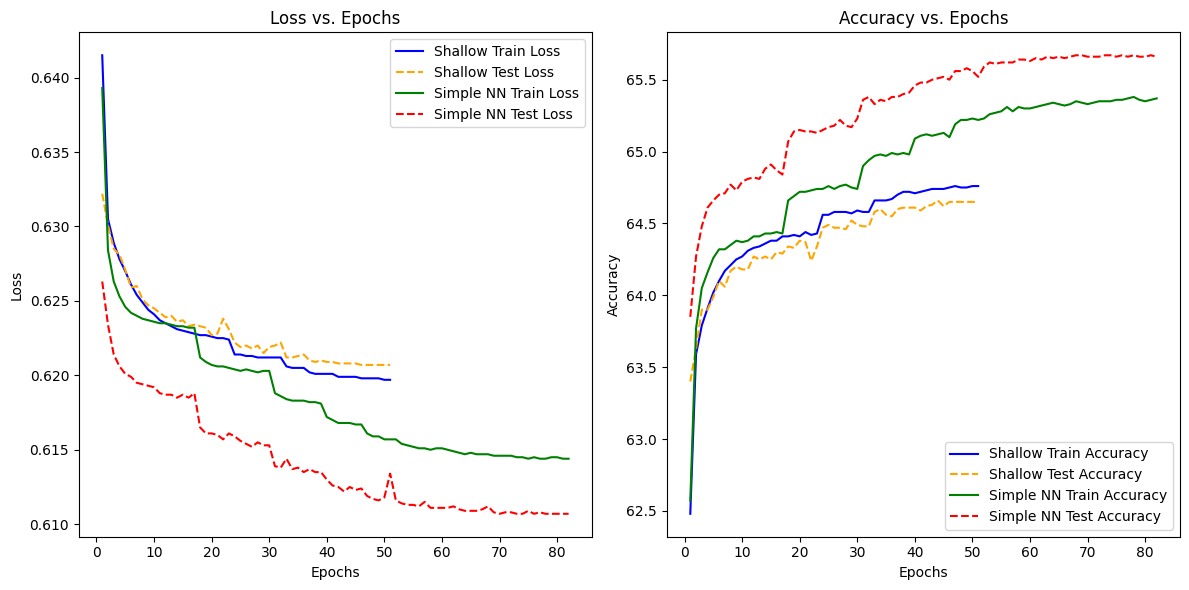

In [20]:


plt.subplot(1, 2, 1)
plt.plot(np.arange(1, len(simple_nn_train_loss) + 1), simple_nn_train_loss, label='Simple NN Train Loss', color='green')
plt.plot(np.arange(1, len(simple_nn_test_loss) + 1), simple_nn_test_loss, label='Simple NN Test Loss', color='red', linestyle='--')  # Dotted line
plt.plot(np.arange(1, len(shallow_train_loss) + 1), shallow_train_loss, label='Shallow Train Loss', color='blue')
plt.plot(np.arange(1, len(shallow_test_loss) + 1), shallow_test_loss, label='Shallow Test Loss', color='orange', linestyle='--')  # Dotted line
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.arange(1, len(simple_nn_train_accuracy) + 1), simple_nn_train_accuracy, label='Simple NN Train Accuracy', color='green')
plt.plot(np.arange(1, len(simple_nn_test_accuracy) + 1), simple_nn_test_accuracy, label='Simple NN Test Accuracy', color='red', linestyle='--')  # Dotted line
plt.plot(np.arange(1, len(shallow_train_accuracy) + 1), shallow_train_accuracy, label='Shallow Train Accuracy', color='blue')
plt.plot(np.arange(1, len(shallow_test_accuracy) + 1), shallow_test_accuracy, label='Shallow Test Accuracy', color='orange', linestyle='--')  # Dotted line
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()

plt.tight_layout()
plt.show()


### Using PCA for feature Selection

In [ ]:
import helper_functions
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        
        self.model = nn.Sequential(
            nn.Linear(X_train_pca.shape[1], 256), 
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),                            
            
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(64, 1) 
        )

    def forward(self, x):
        return self.model(x)
    

pca_features=['Census_OSInstallLanguageIdentifier', 'OsPlatformSubRelease', 'Census_InternalPrimaryDisplayResolutionHorizontal', 'dpi', 'Census_InternalPrimaryDisplayResolutionVertical', 'CountryIdentifier', 'IsSxsPassiveMode', 'RtpStateBitfield', 'OrganizationIdentifier', 'CityIdentifier', 'GeoNameIdentifier', 'Census_InternalBatteryNumberOfCharges', 'AvSigVersion', 'Census_HasOpticalDiskDrive', 'Census_ChassisTypeName', 'Census_OSBranch', 'Screen_Area', 'Census_GenuineStateName', 'Census_OSBuildRevision', 'Census_IsVirtualDevice', 'magic_4', 'LocaleEnglishNameIdentifier', 'Census_FirmwareVersionIdentifier', 'Census_OEMModelIdentifier', 'Census_MDC2FormFactor', 'Census_OSWUAutoUpdateOptionsName', 'Wdft_RegionIdentifier', 'AppVersion', 'Wdft_IsGamer', 'Firewall', 'Census_ProcessorModelIdentifier', 'Census_TotalPhysicalRAM', 'Census_FlightRing', 'IeVerIdentifier', 'Census_OEMNameIdentifier', 'DefaultBrowsersIdentifier', 'primary_drive_c_ratio', 'Census_PowerPlatformRoleName', 'Census_ProcessorCoreCount', 'Census_FirmwareManufacturerIdentifier', 'AVProductStatesIdentifier', 'SmartScreen', 'Census_OSInstallTypeName', 'Census_OSVersion', 'EngineVersion', 'aspect_ratio', 'IsProtected', 'AVProductsEnabled', 'Census_IsSecureBootEnabled', 'OsBuildLab', 'Processor', 'Census_ActivationChannel', 'OsBuild', 'Census_SystemVolumeTotalCapacity', 'Census_PrimaryDiskTypeName']
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X_train_pca= X_train[pca_features]
X_valid_pca= X_valid[pca_features]
X_train_pca_tensor = torch.tensor(X_train_pca.values, dtype=torch.float32).to(device)
X_valid_pca_tensor = torch.tensor(X_valid_pca.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1).to(device)
y_valid_tensor = torch.tensor(y_valid.values, dtype=torch.float32).view(-1, 1).to(device)
pca_model = MLP()



train_dataset = TensorDataset(X_train_pca_tensor, y_train_tensor)
valid_dataset = TensorDataset(X_valid_pca_tensor, y_valid_tensor)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(pca_model.parameters(), weight_decay=1e-4,lr=0.001) 
pca_model.to(device)

batch_size = 4096
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2)  

num_epochs = 100
best_model_weights, pca_train_loss, pca, pca_train_accuracy, pca_test_accuracy, lrs = helper_functions.train_and_evaluate_model(pca_model, criterion, optimizer, scheduler, train_loader, test_loader, num_epochs,early_stopping_patience=5)
torch.save(best_model_weights, '2hl_advanced_encodings_pca.pth')


Epoch 1/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:01<00:00,  9.58it/s, acc=62.08%, loss=0.6306]


Epoch 1 Loss: 0.6401, Train Accuracy: 62.34%
Test Loss: 0.6271, Test Accuracy: 63.69%


Epoch 2/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:09<00:00,  9.19it/s, acc=63.16%, loss=0.6292]


Epoch 2 Loss: 0.6290, Train Accuracy: 63.63%
Test Loss: 0.6238, Test Accuracy: 64.17%


Epoch 3/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:10<00:00,  9.17it/s, acc=64.39%, loss=0.6249]


Epoch 3 Loss: 0.6272, Train Accuracy: 63.89%
Test Loss: 0.6222, Test Accuracy: 64.43%


Epoch 4/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:11<00:00,  9.11it/s, acc=64.60%, loss=0.6204]


Epoch 4 Loss: 0.6261, Train Accuracy: 64.04%
Test Loss: 0.6216, Test Accuracy: 64.43%


Epoch 5/100 - LR: 0.001000: 100%|██████████| 1743/1743 [02:59<00:00,  9.71it/s, acc=65.52%, loss=0.6196]


Epoch 5 Loss: 0.6255, Train Accuracy: 64.13%
Test Loss: 0.6211, Test Accuracy: 64.53%


Epoch 6/100 - LR: 0.001000: 100%|██████████| 1743/1743 [02:58<00:00,  9.77it/s, acc=62.90%, loss=0.6316]


Epoch 6 Loss: 0.6251, Train Accuracy: 64.17%
Test Loss: 0.6208, Test Accuracy: 64.59%


Epoch 7/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:01<00:00,  9.60it/s, acc=62.85%, loss=0.6360]


Epoch 7 Loss: 0.6249, Train Accuracy: 64.18%
Test Loss: 0.6203, Test Accuracy: 64.63%


Epoch 8/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:00<00:00,  9.65it/s, acc=63.47%, loss=0.6215]


Epoch 8 Loss: 0.6248, Train Accuracy: 64.22%
Test Loss: 0.6205, Test Accuracy: 64.64%


Epoch 9/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:02<00:00,  9.54it/s, acc=63.06%, loss=0.6337]


Epoch 9 Loss: 0.6247, Train Accuracy: 64.23%
Test Loss: 0.6203, Test Accuracy: 64.62%


Epoch 10/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:03<00:00,  9.51it/s, acc=64.08%, loss=0.6254]


Epoch 10 Loss: 0.6246, Train Accuracy: 64.24%
Test Loss: 0.6201, Test Accuracy: 64.63%


Epoch 11/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:01<00:00,  9.59it/s, acc=64.60%, loss=0.6320]


Epoch 11 Loss: 0.6244, Train Accuracy: 64.26%
Test Loss: 0.6202, Test Accuracy: 64.68%


Epoch 12/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:00<00:00,  9.64it/s, acc=64.19%, loss=0.6279]


Epoch 12 Loss: 0.6243, Train Accuracy: 64.27%
Test Loss: 0.6197, Test Accuracy: 64.73%


Epoch 13/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:01<00:00,  9.60it/s, acc=62.96%, loss=0.6325]


Epoch 13 Loss: 0.6243, Train Accuracy: 64.27%
Test Loss: 0.6199, Test Accuracy: 64.72%


Epoch 14/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:00<00:00,  9.67it/s, acc=64.44%, loss=0.6151]


Epoch 14 Loss: 0.6242, Train Accuracy: 64.27%
Test Loss: 0.6194, Test Accuracy: 64.74%


Epoch 15/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:23<00:00,  8.57it/s, acc=66.50%, loss=0.6127]


Epoch 15 Loss: 0.6242, Train Accuracy: 64.27%
Test Loss: 0.6195, Test Accuracy: 64.78%


Epoch 16/100 - LR: 0.001000: 100%|██████████| 1743/1743 [02:54<00:00, 10.00it/s, acc=63.83%, loss=0.6256]


Epoch 16 Loss: 0.6241, Train Accuracy: 64.28%
Test Loss: 0.6194, Test Accuracy: 64.78%


Epoch 17/100 - LR: 0.001000: 100%|██████████| 1743/1743 [02:56<00:00,  9.86it/s, acc=64.91%, loss=0.6247]


Epoch 17 Loss: 0.6241, Train Accuracy: 64.29%
Test Loss: 0.6197, Test Accuracy: 64.76%
Learning rate changed from 0.001000 to 0.000500


Epoch 18/100 - LR: 0.000500: 100%|██████████| 1743/1743 [03:03<00:00,  9.47it/s, acc=65.01%, loss=0.6233]


Epoch 18 Loss: 0.6222, Train Accuracy: 64.50%
Test Loss: 0.6175, Test Accuracy: 64.90%


Epoch 19/100 - LR: 0.000500: 100%|██████████| 1743/1743 [02:41<00:00, 10.81it/s, acc=64.44%, loss=0.6210]


Epoch 19 Loss: 0.6218, Train Accuracy: 64.53%
Test Loss: 0.6172, Test Accuracy: 64.98%


Epoch 20/100 - LR: 0.000500: 100%|██████████| 1743/1743 [02:41<00:00, 10.82it/s, acc=64.65%, loss=0.6187]


Epoch 20 Loss: 0.6217, Train Accuracy: 64.56%
Test Loss: 0.6173, Test Accuracy: 64.98%


Epoch 21/100 - LR: 0.000500: 100%|██████████| 1743/1743 [03:01<00:00,  9.59it/s, acc=64.39%, loss=0.6168]


Epoch 21 Loss: 0.6216, Train Accuracy: 64.58%
Test Loss: 0.6167, Test Accuracy: 65.04%


Epoch 22/100 - LR: 0.000500: 100%|██████████| 1743/1743 [03:08<00:00,  9.25it/s, acc=65.67%, loss=0.6100]


Epoch 22 Loss: 0.6215, Train Accuracy: 64.60%
Test Loss: 0.6166, Test Accuracy: 65.05%


Epoch 23/100 - LR: 0.000500: 100%|██████████| 1743/1743 [02:43<00:00, 10.64it/s, acc=63.16%, loss=0.6263]


Epoch 23 Loss: 0.6214, Train Accuracy: 64.59%
Test Loss: 0.6169, Test Accuracy: 65.02%


Epoch 24/100 - LR: 0.000500: 100%|██████████| 1743/1743 [02:52<00:00, 10.13it/s, acc=63.57%, loss=0.6235]


Epoch 24 Loss: 0.6214, Train Accuracy: 64.57%
Test Loss: 0.6169, Test Accuracy: 64.99%
Learning rate changed from 0.000500 to 0.000250


Epoch 25/100 - LR: 0.000250: 100%|██████████| 1743/1743 [02:56<00:00,  9.86it/s, acc=65.32%, loss=0.6195]


Epoch 25 Loss: 0.6201, Train Accuracy: 64.73%
Test Loss: 0.6155, Test Accuracy: 65.19%


Epoch 26/100 - LR: 0.000250: 100%|██████████| 1743/1743 [02:48<00:00, 10.35it/s, acc=65.78%, loss=0.5988]


Epoch 26 Loss: 0.6196, Train Accuracy: 64.80%
Test Loss: 0.6152, Test Accuracy: 65.16%


Epoch 27/100 - LR: 0.000250: 100%|██████████| 1743/1743 [02:47<00:00, 10.42it/s, acc=65.47%, loss=0.6194]


Epoch 27 Loss: 0.6196, Train Accuracy: 64.78%
Test Loss: 0.6152, Test Accuracy: 65.17%


Epoch 28/100 - LR: 0.000250: 100%|██████████| 1743/1743 [03:00<00:00,  9.65it/s, acc=65.26%, loss=0.6196]


Epoch 28 Loss: 0.6196, Train Accuracy: 64.78%
Test Loss: 0.6151, Test Accuracy: 65.19%


Epoch 29/100 - LR: 0.000250: 100%|██████████| 1743/1743 [02:54<00:00,  9.98it/s, acc=65.32%, loss=0.6262]


Epoch 29 Loss: 0.6196, Train Accuracy: 64.78%
Test Loss: 0.6149, Test Accuracy: 65.22%


Epoch 30/100 - LR: 0.000250: 100%|██████████| 1743/1743 [02:47<00:00, 10.40it/s, acc=65.52%, loss=0.6082]


Epoch 30 Loss: 0.6195, Train Accuracy: 64.80%
Test Loss: 0.6151, Test Accuracy: 65.21%


Epoch 31/100 - LR: 0.000250: 100%|██████████| 1743/1743 [03:08<00:00,  9.23it/s, acc=64.49%, loss=0.6187]


Epoch 31 Loss: 0.6194, Train Accuracy: 64.80%
Test Loss: 0.6148, Test Accuracy: 65.23%


Epoch 32/100 - LR: 0.000250: 100%|██████████| 1743/1743 [02:55<00:00,  9.92it/s, acc=64.75%, loss=0.6183]


Epoch 32 Loss: 0.6194, Train Accuracy: 64.81%
Test Loss: 0.6147, Test Accuracy: 65.24%


Epoch 33/100 - LR: 0.000250: 100%|██████████| 1743/1743 [03:04<00:00,  9.47it/s, acc=66.65%, loss=0.6137]


Epoch 33 Loss: 0.6193, Train Accuracy: 64.82%
Test Loss: 0.6147, Test Accuracy: 65.22%


Epoch 34/100 - LR: 0.000250: 100%|██████████| 1743/1743 [02:37<00:00, 11.06it/s, acc=63.57%, loss=0.6197]


Epoch 34 Loss: 0.6193, Train Accuracy: 64.84%
Test Loss: 0.6148, Test Accuracy: 65.23%


Epoch 35/100 - LR: 0.000250: 100%|██████████| 1743/1743 [02:39<00:00, 10.89it/s, acc=62.96%, loss=0.6341]


Epoch 35 Loss: 0.6193, Train Accuracy: 64.82%
Test Loss: 0.6147, Test Accuracy: 65.24%
Learning rate changed from 0.000250 to 0.000125


Epoch 36/100 - LR: 0.000125: 100%|██████████| 1743/1743 [02:17<00:00, 12.66it/s, acc=66.60%, loss=0.6079]


Epoch 36 Loss: 0.6182, Train Accuracy: 64.93%
Test Loss: 0.6138, Test Accuracy: 65.33%


Epoch 37/100 - LR: 0.000125: 100%|██████████| 1743/1743 [02:23<00:00, 12.13it/s, acc=63.93%, loss=0.6169]


Epoch 37 Loss: 0.6181, Train Accuracy: 64.96%
Test Loss: 0.6137, Test Accuracy: 65.35%


Epoch 38/100 - LR: 0.000125: 100%|██████████| 1743/1743 [02:36<00:00, 11.11it/s, acc=63.88%, loss=0.6381]


Epoch 38 Loss: 0.6180, Train Accuracy: 64.97%
Test Loss: 0.6137, Test Accuracy: 65.33%


Epoch 39/100 - LR: 0.000125: 100%|██████████| 1743/1743 [02:35<00:00, 11.24it/s, acc=64.75%, loss=0.6113]


Epoch 39 Loss: 0.6181, Train Accuracy: 64.97%
Test Loss: 0.6136, Test Accuracy: 65.37%


Epoch 40/100 - LR: 0.000125: 100%|██████████| 1743/1743 [02:20<00:00, 12.43it/s, acc=62.80%, loss=0.6369]


Epoch 40 Loss: 0.6179, Train Accuracy: 64.98%
Test Loss: 0.6135, Test Accuracy: 65.36%


Epoch 41/100 - LR: 0.000125: 100%|██████████| 1743/1743 [02:18<00:00, 12.56it/s, acc=65.52%, loss=0.6143]


Epoch 41 Loss: 0.6179, Train Accuracy: 64.97%
Test Loss: 0.6135, Test Accuracy: 65.37%


Epoch 42/100 - LR: 0.000125: 100%|██████████| 1743/1743 [02:17<00:00, 12.66it/s, acc=65.62%, loss=0.6149]


Epoch 42 Loss: 0.6179, Train Accuracy: 64.97%
Test Loss: 0.6135, Test Accuracy: 65.37%


Epoch 43/100 - LR: 0.000125: 100%|██████████| 1743/1743 [02:18<00:00, 12.62it/s, acc=66.03%, loss=0.6098]


Epoch 43 Loss: 0.6178, Train Accuracy: 65.00%
Test Loss: 0.6136, Test Accuracy: 65.35%


Epoch 44/100 - LR: 0.000125: 100%|██████████| 1743/1743 [02:19<00:00, 12.47it/s, acc=64.85%, loss=0.6113]


Epoch 44 Loss: 0.6177, Train Accuracy: 65.00%
Test Loss: 0.6134, Test Accuracy: 65.38%


Epoch 45/100 - LR: 0.000125: 100%|██████████| 1743/1743 [03:06<00:00,  9.36it/s, acc=64.29%, loss=0.6172]


Epoch 45 Loss: 0.6177, Train Accuracy: 64.99%
Test Loss: 0.6134, Test Accuracy: 65.35%


Epoch 46/100 - LR: 0.000125: 100%|██████████| 1743/1743 [02:47<00:00, 10.38it/s, acc=65.93%, loss=0.6105]


Epoch 46 Loss: 0.6177, Train Accuracy: 65.00%
Test Loss: 0.6134, Test Accuracy: 65.37%


Epoch 47/100 - LR: 0.000125: 100%|██████████| 1743/1743 [03:04<00:00,  9.45it/s, acc=66.39%, loss=0.6088]


Epoch 47 Loss: 0.6177, Train Accuracy: 65.00%
Test Loss: 0.6136, Test Accuracy: 65.37%
Learning rate changed from 0.000125 to 0.000063


Epoch 48/100 - LR: 0.000063: 100%|██████████| 1743/1743 [03:07<00:00,  9.32it/s, acc=65.78%, loss=0.6116]


Epoch 48 Loss: 0.6171, Train Accuracy: 65.04%
Test Loss: 0.6129, Test Accuracy: 65.43%


Epoch 49/100 - LR: 0.000063: 100%|██████████| 1743/1743 [03:06<00:00,  9.36it/s, acc=66.80%, loss=0.6039]


Epoch 49 Loss: 0.6170, Train Accuracy: 65.07%
Test Loss: 0.6127, Test Accuracy: 65.45%


Epoch 50/100 - LR: 0.000063: 100%|██████████| 1743/1743 [03:00<00:00,  9.64it/s, acc=64.65%, loss=0.6191]


Epoch 50 Loss: 0.6170, Train Accuracy: 65.06%
Test Loss: 0.6129, Test Accuracy: 65.44%


Epoch 51/100 - LR: 0.000063: 100%|██████████| 1743/1743 [02:44<00:00, 10.63it/s, acc=65.37%, loss=0.6192]


Epoch 51 Loss: 0.6168, Train Accuracy: 65.10%
Test Loss: 0.6127, Test Accuracy: 65.44%


Epoch 52/100 - LR: 0.000063: 100%|██████████| 1743/1743 [02:50<00:00, 10.24it/s, acc=64.03%, loss=0.6281]


Epoch 52 Loss: 0.6169, Train Accuracy: 65.09%
Test Loss: 0.6126, Test Accuracy: 65.48%


Epoch 53/100 - LR: 0.000063: 100%|██████████| 1743/1743 [03:08<00:00,  9.24it/s, acc=64.65%, loss=0.6225]


Epoch 53 Loss: 0.6168, Train Accuracy: 65.10%
Test Loss: 0.6127, Test Accuracy: 65.44%


Epoch 54/100 - LR: 0.000063: 100%|██████████| 1743/1743 [03:09<00:00,  9.22it/s, acc=65.83%, loss=0.6038]


Epoch 54 Loss: 0.6168, Train Accuracy: 65.09%
Test Loss: 0.6126, Test Accuracy: 65.46%


Epoch 55/100 - LR: 0.000063: 100%|██████████| 1743/1743 [03:03<00:00,  9.49it/s, acc=63.57%, loss=0.6206]


Epoch 55 Loss: 0.6167, Train Accuracy: 65.10%
Test Loss: 0.6126, Test Accuracy: 65.48%
Learning rate changed from 0.000063 to 0.000031


Epoch 56/100 - LR: 0.000031: 100%|██████████| 1743/1743 [03:02<00:00,  9.57it/s, acc=66.14%, loss=0.6101]


Epoch 56 Loss: 0.6164, Train Accuracy: 65.14%
Test Loss: 0.6124, Test Accuracy: 65.49%


Epoch 57/100 - LR: 0.000031: 100%|██████████| 1743/1743 [02:59<00:00,  9.73it/s, acc=67.01%, loss=0.5967]


Epoch 57 Loss: 0.6163, Train Accuracy: 65.15%
Test Loss: 0.6123, Test Accuracy: 65.49%


Epoch 58/100 - LR: 0.000031: 100%|██████████| 1743/1743 [02:51<00:00, 10.18it/s, acc=66.34%, loss=0.6089]


Epoch 58 Loss: 0.6162, Train Accuracy: 65.15%
Test Loss: 0.6123, Test Accuracy: 65.50%


Epoch 59/100 - LR: 0.000031: 100%|██████████| 1743/1743 [02:53<00:00, 10.05it/s, acc=64.85%, loss=0.6088]


Epoch 59 Loss: 0.6162, Train Accuracy: 65.16%
Test Loss: 0.6123, Test Accuracy: 65.48%


Epoch 60/100 - LR: 0.000031: 100%|██████████| 1743/1743 [02:51<00:00, 10.14it/s, acc=62.75%, loss=0.6264]


Epoch 60 Loss: 0.6162, Train Accuracy: 65.15%
Test Loss: 0.6122, Test Accuracy: 65.51%


Epoch 61/100 - LR: 0.000031: 100%|██████████| 1743/1743 [02:46<00:00, 10.44it/s, acc=66.24%, loss=0.5998]


Epoch 61 Loss: 0.6161, Train Accuracy: 65.15%
Test Loss: 0.6121, Test Accuracy: 65.52%


Epoch 62/100 - LR: 0.000031: 100%|██████████| 1743/1743 [02:50<00:00, 10.20it/s, acc=66.44%, loss=0.6060]


Epoch 62 Loss: 0.6162, Train Accuracy: 65.15%
Test Loss: 0.6123, Test Accuracy: 65.50%


Epoch 63/100 - LR: 0.000031: 100%|██████████| 1743/1743 [02:42<00:00, 10.76it/s, acc=64.29%, loss=0.6188]


Epoch 63 Loss: 0.6161, Train Accuracy: 65.17%
Test Loss: 0.6123, Test Accuracy: 65.50%
Learning rate changed from 0.000031 to 0.000016


Epoch 64/100 - LR: 0.000016: 100%|██████████| 1743/1743 [02:53<00:00, 10.05it/s, acc=65.16%, loss=0.6238]


Epoch 64 Loss: 0.6160, Train Accuracy: 65.18%
Test Loss: 0.6121, Test Accuracy: 65.53%


Epoch 65/100 - LR: 0.000016: 100%|██████████| 1743/1743 [02:56<00:00,  9.88it/s, acc=64.49%, loss=0.6205]


Epoch 65 Loss: 0.6159, Train Accuracy: 65.19%
Test Loss: 0.6121, Test Accuracy: 65.52%


Epoch 66/100 - LR: 0.000016: 100%|██████████| 1743/1743 [03:03<00:00,  9.48it/s, acc=66.19%, loss=0.6034]


Epoch 66 Loss: 0.6158, Train Accuracy: 65.19%
Test Loss: 0.6120, Test Accuracy: 65.52%


Epoch 67/100 - LR: 0.000016: 100%|██████████| 1743/1743 [02:58<00:00,  9.74it/s, acc=65.67%, loss=0.6064]


Epoch 67 Loss: 0.6158, Train Accuracy: 65.19%
Test Loss: 0.6121, Test Accuracy: 65.52%


Epoch 68/100 - LR: 0.000016: 100%|██████████| 1743/1743 [02:55<00:00,  9.95it/s, acc=66.44%, loss=0.6127]


Epoch 68 Loss: 0.6158, Train Accuracy: 65.20%
Test Loss: 0.6120, Test Accuracy: 65.54%
Learning rate changed from 0.000016 to 0.000008


Epoch 69/100 - LR: 0.000008: 100%|██████████| 1743/1743 [02:53<00:00, 10.04it/s, acc=63.98%, loss=0.6203]


Epoch 69 Loss: 0.6157, Train Accuracy: 65.20%
Test Loss: 0.6119, Test Accuracy: 65.52%


Epoch 70/100 - LR: 0.000008: 100%|██████████| 1743/1743 [02:53<00:00, 10.02it/s, acc=65.57%, loss=0.6165]


Epoch 70 Loss: 0.6157, Train Accuracy: 65.21%
Test Loss: 0.6120, Test Accuracy: 65.53%


Epoch 71/100 - LR: 0.000008: 100%|██████████| 1743/1743 [02:36<00:00, 11.17it/s, acc=64.75%, loss=0.6137]


Epoch 71 Loss: 0.6157, Train Accuracy: 65.21%
Test Loss: 0.6119, Test Accuracy: 65.53%


Epoch 72/100 - LR: 0.000008: 100%|██████████| 1743/1743 [02:33<00:00, 11.35it/s, acc=64.75%, loss=0.6113]


Epoch 72 Loss: 0.6157, Train Accuracy: 65.21%
Test Loss: 0.6120, Test Accuracy: 65.52%
Learning rate changed from 0.000008 to 0.000004


Epoch 73/100 - LR: 0.000004: 100%|██████████| 1743/1743 [02:32<00:00, 11.42it/s, acc=64.85%, loss=0.6202]


Epoch 73 Loss: 0.6156, Train Accuracy: 65.21%
Test Loss: 0.6119, Test Accuracy: 65.53%


Epoch 74/100 - LR: 0.000004: 100%|██████████| 1743/1743 [02:32<00:00, 11.45it/s, acc=66.03%, loss=0.6125]


Epoch 74 Loss: 0.6156, Train Accuracy: 65.21%
Test Loss: 0.6119, Test Accuracy: 65.53%


Epoch 75/100 - LR: 0.000004: 100%|██████████| 1743/1743 [02:32<00:00, 11.41it/s, acc=67.68%, loss=0.6031]


Epoch 75 Loss: 0.6156, Train Accuracy: 65.22%
Test Loss: 0.6120, Test Accuracy: 65.53%
Learning rate changed from 0.000004 to 0.000002


Epoch 76/100 - LR: 0.000002: 100%|██████████| 1743/1743 [02:45<00:00, 10.54it/s, acc=66.70%, loss=0.6075]


Epoch 76 Loss: 0.6155, Train Accuracy: 65.22%
Test Loss: 0.6119, Test Accuracy: 65.55%


Epoch 77/100 - LR: 0.000002: 100%|██████████| 1743/1743 [03:06<00:00,  9.35it/s, acc=65.32%, loss=0.6163]


Epoch 77 Loss: 0.6156, Train Accuracy: 65.23%
Test Loss: 0.6119, Test Accuracy: 65.54%


Epoch 78/100 - LR: 0.000002: 100%|██████████| 1743/1743 [02:57<00:00,  9.82it/s, acc=63.52%, loss=0.6249]


Epoch 78 Loss: 0.6155, Train Accuracy: 65.22%
Test Loss: 0.6118, Test Accuracy: 65.54%


Epoch 79/100 - LR: 0.000002: 100%|██████████| 1743/1743 [02:25<00:00, 12.01it/s, acc=64.70%, loss=0.6168]


Epoch 79 Loss: 0.6155, Train Accuracy: 65.22%
Test Loss: 0.6118, Test Accuracy: 65.54%


Epoch 80/100 - LR: 0.000002: 100%|██████████| 1743/1743 [02:23<00:00, 12.11it/s, acc=67.06%, loss=0.6002]


Epoch 80 Loss: 0.6155, Train Accuracy: 65.23%
Test Loss: 0.6118, Test Accuracy: 65.54%


Epoch 81/100 - LR: 0.000002: 100%|██████████| 1743/1743 [02:23<00:00, 12.17it/s, acc=63.31%, loss=0.6214]


Epoch 81 Loss: 0.6155, Train Accuracy: 65.22%
Test Loss: 0.6119, Test Accuracy: 65.54%
Learning rate changed from 0.000002 to 0.000001


Epoch 82/100 - LR: 0.000001: 100%|██████████| 1743/1743 [02:23<00:00, 12.14it/s, acc=64.24%, loss=0.6267]


Epoch 82 Loss: 0.6155, Train Accuracy: 65.22%
Test Loss: 0.6119, Test Accuracy: 65.53%


Epoch 83/100 - LR: 0.000001: 100%|██████████| 1743/1743 [02:38<00:00, 10.99it/s, acc=65.73%, loss=0.6078]


Epoch 83 Loss: 0.6155, Train Accuracy: 65.23%
Test Loss: 0.6119, Test Accuracy: 65.55%


Epoch 84/100 - LR: 0.000001: 100%|██████████| 1743/1743 [03:03<00:00,  9.52it/s, acc=65.32%, loss=0.6160]


Epoch 84 Loss: 0.6155, Train Accuracy: 65.24%
Test Loss: 0.6119, Test Accuracy: 65.54%
Learning rate changed from 0.000001 to 0.000000


Epoch 85/100 - LR: 0.000000: 100%|██████████| 1743/1743 [02:26<00:00, 11.93it/s, acc=64.60%, loss=0.6198]


Epoch 85 Loss: 0.6155, Train Accuracy: 65.22%
Test Loss: 0.6119, Test Accuracy: 65.55%
Early stopping triggered at epoch 85. Best model was from epoch 76.


: 

### Using LDA for feature Selection

In [13]:
import helper_functions
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Define the feature list selected by LDA
lda_selected_features = [
    'Firewall', 'Census_OEMModelIdentifier', 'Census_FirmwareManufacturerIdentifier', 'Census_OEMNameIdentifier',
    'IeVerIdentifier', 'Census_PrimaryDiskTypeName', 'IsSxsPassiveMode', 'OsBuildLab', 'AVProductsEnabled',
    'Census_InternalPrimaryDisplayResolutionVertical', 'Screen_Area', 'Census_MDC2FormFactor',
    'Wdft_RegionIdentifier', 'AppVersion', 'AvSigVersion', 'Census_ProcessorModelIdentifier',
    'Census_ProcessorCoreCount', 'Census_FlightRing', 'Census_ActivationChannel', 'Census_SystemVolumeTotalCapacity',
    'Census_OSInstallLanguageIdentifier', 'aspect_ratio', 'RtpStateBitfield', 'Census_IsSecureBootEnabled',
    'Census_GenuineStateName', 'OsSuite', 'LocaleEnglishNameIdentifier', 'OsPlatformSubRelease',
    'Census_TotalPhysicalRAM', 'Census_PowerPlatformRoleName', 'magic_4', 'Census_OSUILocaleIdentifier',
    'Census_HasOpticalDiskDrive', 'DefaultBrowsersIdentifier', 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
    'Census_OSBranch', 'Census_OSVersion', 'AVProductsInstalled_slim', 'OsBuild',
    'Census_InternalBatteryNumberOfCharges', 'Wdft_IsGamer', 'Census_OSInstallTypeName', 'SkuEdition',
    'IsProtected', 'Census_IsVirtualDevice', 'primary_drive_c_ratio', 'Processor',
    'Census_InternalPrimaryDisplayResolutionHorizontal', 'SmartScreen', 'AVProductStatesIdentifier',
    'EngineVersion', 'dpi', 'AVProductsInstalled', 'Census_OSSkuName', 'Census_OSEdition'
]

# Prepare the data
X_train_lda_fs = X_train[lda_selected_features]
X_valid_lda_fs = X_valid[lda_selected_features]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X_train_tensor = torch.tensor(X_train_lda_fs.values, dtype=torch.float32).to(device)
X_valid_tensor = torch.tensor(X_valid_lda_fs.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1).to(device)
y_valid_tensor = torch.tensor(y_valid.values, dtype=torch.float32).view(-1, 1).to(device)

# Create datasets and loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
valid_dataset = TensorDataset(X_valid_tensor, y_valid_tensor)
batch_size = 4096
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

# Define the model (same architecture as PCA model)
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(X_train_lda_fs.shape[1], 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.model(x)

# Initialize model, loss, optimizer
lda_fs_model = MLP().to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(lda_fs_model.parameters(), weight_decay=1e-4, lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2)

# Train the model
num_epochs = 100
best_model_weights, lda_fs_train_loss, lda_fs_model_trained, lda_fs_train_accuracy, lda_fs_test_accuracy, lrs = helper_functions.train_and_evaluate_model(
    lda_fs_model, criterion, optimizer, scheduler, train_loader, test_loader, num_epochs
)


Epoch 1/100 - LR: 0.001000: 100%|██████████| 1743/1743 [02:30<00:00, 11.58it/s, acc=62.96%, loss=0.6342]


Epoch 1 Loss: 0.6386, Train Accuracy: 62.62%
Test Loss: 0.6261, Test Accuracy: 63.85%


Epoch 2/100 - LR: 0.001000: 100%|██████████| 1743/1743 [02:27<00:00, 11.80it/s, acc=65.83%, loss=0.6230]


Epoch 2 Loss: 0.6283, Train Accuracy: 63.76%
Test Loss: 0.6234, Test Accuracy: 64.29%


Epoch 3/100 - LR: 0.001000: 100%|██████████| 1743/1743 [02:48<00:00, 10.37it/s, acc=63.83%, loss=0.6260]


Epoch 3 Loss: 0.6265, Train Accuracy: 64.02%
Test Loss: 0.6217, Test Accuracy: 64.47%


Epoch 4/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:04<00:00,  9.43it/s, acc=63.37%, loss=0.6346]


Epoch 4 Loss: 0.6257, Train Accuracy: 64.14%
Test Loss: 0.6211, Test Accuracy: 64.54%


Epoch 5/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:05<00:00,  9.41it/s, acc=64.60%, loss=0.6264]


Epoch 5 Loss: 0.6251, Train Accuracy: 64.20%
Test Loss: 0.6212, Test Accuracy: 64.58%


Epoch 6/100 - LR: 0.001000: 100%|██████████| 1743/1743 [02:34<00:00, 11.27it/s, acc=63.57%, loss=0.6391]


Epoch 6 Loss: 0.6247, Train Accuracy: 64.25%
Test Loss: 0.6204, Test Accuracy: 64.61%


Epoch 7/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:02<00:00,  9.54it/s, acc=62.90%, loss=0.6328]


Epoch 7 Loss: 0.6245, Train Accuracy: 64.27%
Test Loss: 0.6202, Test Accuracy: 64.69%


Epoch 8/100 - LR: 0.001000: 100%|██████████| 1743/1743 [02:57<00:00,  9.84it/s, acc=63.21%, loss=0.6309]


Epoch 8 Loss: 0.6243, Train Accuracy: 64.29%
Test Loss: 0.6199, Test Accuracy: 64.72%


Epoch 9/100 - LR: 0.001000: 100%|██████████| 1743/1743 [02:50<00:00, 10.25it/s, acc=63.52%, loss=0.6232]


Epoch 9 Loss: 0.6243, Train Accuracy: 64.30%
Test Loss: 0.6199, Test Accuracy: 64.73%


Epoch 10/100 - LR: 0.001000: 100%|██████████| 1743/1743 [02:57<00:00,  9.82it/s, acc=64.34%, loss=0.6200]


Epoch 10 Loss: 0.6241, Train Accuracy: 64.33%
Test Loss: 0.6198, Test Accuracy: 64.73%


Epoch 11/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:01<00:00,  9.60it/s, acc=63.98%, loss=0.6124]


Epoch 11 Loss: 0.6240, Train Accuracy: 64.33%
Test Loss: 0.6198, Test Accuracy: 64.75%


Epoch 12/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:04<00:00,  9.46it/s, acc=63.98%, loss=0.6172]


Epoch 12 Loss: 0.6240, Train Accuracy: 64.34%
Test Loss: 0.6197, Test Accuracy: 64.74%


Epoch 13/100 - LR: 0.001000: 100%|██████████| 1743/1743 [02:59<00:00,  9.72it/s, acc=62.24%, loss=0.6296]


Epoch 13 Loss: 0.6239, Train Accuracy: 64.34%
Test Loss: 0.6193, Test Accuracy: 64.71%


Epoch 14/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:06<00:00,  9.35it/s, acc=64.19%, loss=0.6276]


Epoch 14 Loss: 0.6239, Train Accuracy: 64.36%
Test Loss: 0.6196, Test Accuracy: 64.76%


Epoch 15/100 - LR: 0.001000: 100%|██████████| 1743/1743 [03:04<00:00,  9.47it/s, acc=64.70%, loss=0.6174]


Epoch 15 Loss: 0.6239, Train Accuracy: 64.35%
Test Loss: 0.6196, Test Accuracy: 64.74%


Epoch 16/100 - LR: 0.001000: 100%|██████████| 1743/1743 [02:55<00:00,  9.93it/s, acc=62.08%, loss=0.6294]


Epoch 16 Loss: 0.6238, Train Accuracy: 64.35%
Test Loss: 0.6192, Test Accuracy: 64.75%


Epoch 17/100 - LR: 0.001000: 100%|██████████| 1743/1743 [02:56<00:00,  9.89it/s, acc=62.65%, loss=0.6341]


Epoch 17 Loss: 0.6238, Train Accuracy: 64.37%
Test Loss: 0.6194, Test Accuracy: 64.78%


Epoch 18/100 - LR: 0.001000: 100%|██████████| 1743/1743 [02:45<00:00, 10.54it/s, acc=63.37%, loss=0.6328]


Epoch 18 Loss: 0.6238, Train Accuracy: 64.36%
Test Loss: 0.6197, Test Accuracy: 64.70%


Epoch 19/100 - LR: 0.001000: 100%|██████████| 1743/1743 [02:48<00:00, 10.34it/s, acc=64.34%, loss=0.6293]


Epoch 19 Loss: 0.6237, Train Accuracy: 64.36%
Test Loss: 0.6193, Test Accuracy: 64.78%
Learning rate changed from 0.001000 to 0.000500


Epoch 20/100 - LR: 0.000500: 100%|██████████| 1743/1743 [02:52<00:00, 10.08it/s, acc=63.26%, loss=0.6305]


Epoch 20 Loss: 0.6220, Train Accuracy: 64.56%
Test Loss: 0.6175, Test Accuracy: 64.98%


Epoch 21/100 - LR: 0.000500: 100%|██████████| 1743/1743 [02:54<00:00,  9.99it/s, acc=63.26%, loss=0.6190]


Epoch 21 Loss: 0.6216, Train Accuracy: 64.60%
Test Loss: 0.6171, Test Accuracy: 64.98%


Epoch 22/100 - LR: 0.000500: 100%|██████████| 1743/1743 [02:53<00:00, 10.02it/s, acc=63.78%, loss=0.6280]


Epoch 22 Loss: 0.6214, Train Accuracy: 64.63%
Test Loss: 0.6172, Test Accuracy: 64.97%


Epoch 23/100 - LR: 0.000500: 100%|██████████| 1743/1743 [02:53<00:00, 10.03it/s, acc=64.34%, loss=0.6158]


Epoch 23 Loss: 0.6214, Train Accuracy: 64.64%
Test Loss: 0.6171, Test Accuracy: 64.99%


Epoch 24/100 - LR: 0.000500: 100%|██████████| 1743/1743 [02:52<00:00, 10.12it/s, acc=66.39%, loss=0.6138]


Epoch 24 Loss: 0.6213, Train Accuracy: 64.64%
Test Loss: 0.6169, Test Accuracy: 64.99%


Epoch 25/100 - LR: 0.000500: 100%|██████████| 1743/1743 [02:51<00:00, 10.18it/s, acc=64.96%, loss=0.6217]


Epoch 25 Loss: 0.6212, Train Accuracy: 64.65%
Test Loss: 0.6166, Test Accuracy: 65.00%


Epoch 26/100 - LR: 0.000500: 100%|██████████| 1743/1743 [02:23<00:00, 12.16it/s, acc=65.83%, loss=0.6148]


Epoch 26 Loss: 0.6212, Train Accuracy: 64.65%
Test Loss: 0.6168, Test Accuracy: 64.96%


Epoch 27/100 - LR: 0.000500: 100%|██████████| 1743/1743 [02:33<00:00, 11.35it/s, acc=64.85%, loss=0.6179]


Epoch 27 Loss: 0.6211, Train Accuracy: 64.66%
Test Loss: 0.6167, Test Accuracy: 65.01%


Epoch 28/100 - LR: 0.000500: 100%|██████████| 1743/1743 [02:35<00:00, 11.18it/s, acc=63.62%, loss=0.6248]


Epoch 28 Loss: 0.6210, Train Accuracy: 64.67%
Test Loss: 0.6164, Test Accuracy: 65.06%


Epoch 29/100 - LR: 0.000500: 100%|██████████| 1743/1743 [02:45<00:00, 10.52it/s, acc=65.78%, loss=0.6132]


Epoch 29 Loss: 0.6211, Train Accuracy: 64.66%
Test Loss: 0.6166, Test Accuracy: 65.07%


Epoch 30/100 - LR: 0.000500: 100%|██████████| 1743/1743 [02:45<00:00, 10.55it/s, acc=65.26%, loss=0.6185]


Epoch 30 Loss: 0.6210, Train Accuracy: 64.67%
Test Loss: 0.6170, Test Accuracy: 65.00%


Epoch 31/100 - LR: 0.000500: 100%|██████████| 1743/1743 [02:30<00:00, 11.56it/s, acc=63.67%, loss=0.6339]


Epoch 31 Loss: 0.6210, Train Accuracy: 64.67%
Test Loss: 0.6166, Test Accuracy: 65.03%
Learning rate changed from 0.000500 to 0.000250


Epoch 32/100 - LR: 0.000250: 100%|██████████| 1743/1743 [02:28<00:00, 11.73it/s, acc=63.83%, loss=0.6326]


Epoch 32 Loss: 0.6197, Train Accuracy: 64.81%
Test Loss: 0.6151, Test Accuracy: 65.15%


Epoch 33/100 - LR: 0.000250: 100%|██████████| 1743/1743 [02:28<00:00, 11.75it/s, acc=64.60%, loss=0.6264]


Epoch 33 Loss: 0.6194, Train Accuracy: 64.82%
Test Loss: 0.6152, Test Accuracy: 65.19%


Epoch 34/100 - LR: 0.000250: 100%|██████████| 1743/1743 [02:28<00:00, 11.77it/s, acc=64.91%, loss=0.6196]


Epoch 34 Loss: 0.6193, Train Accuracy: 64.86%
Test Loss: 0.6152, Test Accuracy: 65.14%


Epoch 35/100 - LR: 0.000250: 100%|██████████| 1743/1743 [02:29<00:00, 11.66it/s, acc=63.83%, loss=0.6190]


Epoch 35 Loss: 0.6193, Train Accuracy: 64.84%
Test Loss: 0.6151, Test Accuracy: 65.21%
Learning rate changed from 0.000250 to 0.000125


Epoch 36/100 - LR: 0.000125: 100%|██████████| 1743/1743 [02:28<00:00, 11.73it/s, acc=64.70%, loss=0.6239]


Epoch 36 Loss: 0.6184, Train Accuracy: 64.94%
Test Loss: 0.6142, Test Accuracy: 65.26%


Epoch 37/100 - LR: 0.000125: 100%|██████████| 1743/1743 [02:28<00:00, 11.73it/s, acc=64.96%, loss=0.6188]


Epoch 37 Loss: 0.6182, Train Accuracy: 64.95%
Test Loss: 0.6141, Test Accuracy: 65.27%


Epoch 38/100 - LR: 0.000125: 100%|██████████| 1743/1743 [02:24<00:00, 12.03it/s, acc=65.11%, loss=0.6215]


Epoch 38 Loss: 0.6181, Train Accuracy: 64.98%
Test Loss: 0.6140, Test Accuracy: 65.30%


Epoch 39/100 - LR: 0.000125: 100%|██████████| 1743/1743 [02:25<00:00, 11.99it/s, acc=65.26%, loss=0.6248]


Epoch 39 Loss: 0.6180, Train Accuracy: 64.99%
Test Loss: 0.6140, Test Accuracy: 65.27%


Epoch 40/100 - LR: 0.000125: 100%|██████████| 1743/1743 [02:24<00:00, 12.05it/s, acc=63.67%, loss=0.6270]


Epoch 40 Loss: 0.6179, Train Accuracy: 65.01%
Test Loss: 0.6139, Test Accuracy: 65.30%


Epoch 41/100 - LR: 0.000125: 100%|██████████| 1743/1743 [02:25<00:00, 11.97it/s, acc=64.39%, loss=0.6196]


Epoch 41 Loss: 0.6179, Train Accuracy: 64.98%
Test Loss: 0.6138, Test Accuracy: 65.30%


Epoch 42/100 - LR: 0.000125: 100%|██████████| 1743/1743 [02:24<00:00, 12.06it/s, acc=63.47%, loss=0.6313]


Epoch 42 Loss: 0.6178, Train Accuracy: 65.01%
Test Loss: 0.6138, Test Accuracy: 65.33%


Epoch 43/100 - LR: 0.000125: 100%|██████████| 1743/1743 [02:30<00:00, 11.55it/s, acc=63.37%, loss=0.6215]


Epoch 43 Loss: 0.6179, Train Accuracy: 65.00%
Test Loss: 0.6138, Test Accuracy: 65.30%


Epoch 44/100 - LR: 0.000125: 100%|██████████| 1743/1743 [02:25<00:00, 12.02it/s, acc=65.47%, loss=0.6132]


Epoch 44 Loss: 0.6179, Train Accuracy: 64.99%
Test Loss: 0.6139, Test Accuracy: 65.34%
Learning rate changed from 0.000125 to 0.000063


Epoch 45/100 - LR: 0.000063: 100%|██████████| 1743/1743 [02:25<00:00, 11.98it/s, acc=64.44%, loss=0.6207]


Epoch 45 Loss: 0.6172, Train Accuracy: 65.07%
Test Loss: 0.6132, Test Accuracy: 65.38%


Epoch 46/100 - LR: 0.000063: 100%|██████████| 1743/1743 [02:23<00:00, 12.18it/s, acc=65.11%, loss=0.6152]


Epoch 46 Loss: 0.6172, Train Accuracy: 65.08%
Test Loss: 0.6131, Test Accuracy: 65.39%


Epoch 47/100 - LR: 0.000063: 100%|██████████| 1743/1743 [02:24<00:00, 12.03it/s, acc=64.96%, loss=0.6199]


Epoch 47 Loss: 0.6172, Train Accuracy: 65.06%
Test Loss: 0.6132, Test Accuracy: 65.39%


Epoch 48/100 - LR: 0.000063: 100%|██████████| 1743/1743 [02:26<00:00, 11.94it/s, acc=65.57%, loss=0.6017]


Epoch 48 Loss: 0.6170, Train Accuracy: 65.08%
Test Loss: 0.6132, Test Accuracy: 65.39%
Learning rate changed from 0.000063 to 0.000031


Epoch 49/100 - LR: 0.000031: 100%|██████████| 1743/1743 [02:33<00:00, 11.39it/s, acc=65.88%, loss=0.6183]


Epoch 49 Loss: 0.6167, Train Accuracy: 65.12%
Test Loss: 0.6129, Test Accuracy: 65.41%


Epoch 50/100 - LR: 0.000031: 100%|██████████| 1743/1743 [02:24<00:00, 12.03it/s, acc=65.67%, loss=0.6182]


Epoch 50 Loss: 0.6165, Train Accuracy: 65.14%
Test Loss: 0.6128, Test Accuracy: 65.42%


Epoch 51/100 - LR: 0.000031: 100%|██████████| 1743/1743 [02:25<00:00, 12.01it/s, acc=65.98%, loss=0.6154]


Epoch 51 Loss: 0.6166, Train Accuracy: 65.15%
Test Loss: 0.6128, Test Accuracy: 65.41%


Epoch 52/100 - LR: 0.000031: 100%|██████████| 1743/1743 [02:24<00:00, 12.02it/s, acc=65.62%, loss=0.6184]


Epoch 52 Loss: 0.6165, Train Accuracy: 65.13%
Test Loss: 0.6127, Test Accuracy: 65.43%


Epoch 53/100 - LR: 0.000031: 100%|██████████| 1743/1743 [02:24<00:00, 12.08it/s, acc=65.06%, loss=0.6118]


Epoch 53 Loss: 0.6166, Train Accuracy: 65.14%
Test Loss: 0.6127, Test Accuracy: 65.43%


Epoch 54/100 - LR: 0.000031: 100%|██████████| 1743/1743 [02:24<00:00, 12.05it/s, acc=64.44%, loss=0.6177]


Epoch 54 Loss: 0.6165, Train Accuracy: 65.15%
Test Loss: 0.6127, Test Accuracy: 65.43%


Epoch 55/100 - LR: 0.000031: 100%|██████████| 1743/1743 [02:24<00:00, 12.06it/s, acc=64.75%, loss=0.6208]


Epoch 55 Loss: 0.6165, Train Accuracy: 65.15%
Test Loss: 0.6127, Test Accuracy: 65.43%


Epoch 56/100 - LR: 0.000031: 100%|██████████| 1743/1743 [02:24<00:00, 12.04it/s, acc=64.85%, loss=0.6195]


Epoch 56 Loss: 0.6164, Train Accuracy: 65.14%
Test Loss: 0.6126, Test Accuracy: 65.43%


Epoch 57/100 - LR: 0.000031: 100%|██████████| 1743/1743 [02:24<00:00, 12.02it/s, acc=65.83%, loss=0.6110]


Epoch 57 Loss: 0.6164, Train Accuracy: 65.14%
Test Loss: 0.6127, Test Accuracy: 65.43%


Epoch 58/100 - LR: 0.000031: 100%|██████████| 1743/1743 [02:25<00:00, 12.02it/s, acc=65.88%, loss=0.6150]


Epoch 58 Loss: 0.6163, Train Accuracy: 65.16%
Test Loss: 0.6126, Test Accuracy: 65.43%
Learning rate changed from 0.000031 to 0.000016


Epoch 59/100 - LR: 0.000016: 100%|██████████| 1743/1743 [02:25<00:00, 11.97it/s, acc=63.31%, loss=0.6275]


Epoch 59 Loss: 0.6163, Train Accuracy: 65.17%
Test Loss: 0.6126, Test Accuracy: 65.45%


Epoch 60/100 - LR: 0.000016: 100%|██████████| 1743/1743 [02:25<00:00, 11.98it/s, acc=65.16%, loss=0.6226]


Epoch 60 Loss: 0.6162, Train Accuracy: 65.18%
Test Loss: 0.6125, Test Accuracy: 65.45%


Epoch 61/100 - LR: 0.000016: 100%|██████████| 1743/1743 [02:24<00:00, 12.04it/s, acc=65.06%, loss=0.6140]


Epoch 61 Loss: 0.6161, Train Accuracy: 65.18%
Test Loss: 0.6124, Test Accuracy: 65.45%


Epoch 62/100 - LR: 0.000016: 100%|██████████| 1743/1743 [02:24<00:00, 12.05it/s, acc=66.80%, loss=0.6068]


Epoch 62 Loss: 0.6161, Train Accuracy: 65.17%
Test Loss: 0.6126, Test Accuracy: 65.46%


Epoch 63/100 - LR: 0.000016: 100%|██████████| 1743/1743 [02:24<00:00, 12.04it/s, acc=65.52%, loss=0.6141]


Epoch 63 Loss: 0.6161, Train Accuracy: 65.17%
Test Loss: 0.6124, Test Accuracy: 65.46%


Epoch 64/100 - LR: 0.000016: 100%|██████████| 1743/1743 [02:25<00:00, 11.95it/s, acc=63.98%, loss=0.6246]


Epoch 64 Loss: 0.6161, Train Accuracy: 65.19%
Test Loss: 0.6124, Test Accuracy: 65.48%
Learning rate changed from 0.000016 to 0.000008


Epoch 65/100 - LR: 0.000008: 100%|██████████| 1743/1743 [02:24<00:00, 12.09it/s, acc=65.57%, loss=0.6066]


Epoch 65 Loss: 0.6160, Train Accuracy: 65.19%
Test Loss: 0.6124, Test Accuracy: 65.47%


Epoch 66/100 - LR: 0.000008: 100%|██████████| 1743/1743 [02:26<00:00, 11.91it/s, acc=65.52%, loss=0.6149]


Epoch 66 Loss: 0.6160, Train Accuracy: 65.19%
Test Loss: 0.6124, Test Accuracy: 65.47%


Epoch 67/100 - LR: 0.000008: 100%|██████████| 1743/1743 [02:25<00:00, 12.00it/s, acc=64.14%, loss=0.6265]


Epoch 67 Loss: 0.6159, Train Accuracy: 65.19%
Test Loss: 0.6123, Test Accuracy: 65.48%


Epoch 68/100 - LR: 0.000008: 100%|██████████| 1743/1743 [02:25<00:00, 11.97it/s, acc=64.60%, loss=0.6127]


Epoch 68 Loss: 0.6160, Train Accuracy: 65.20%
Test Loss: 0.6123, Test Accuracy: 65.47%
Learning rate changed from 0.000008 to 0.000004


Epoch 69/100 - LR: 0.000004: 100%|██████████| 1743/1743 [02:26<00:00, 11.93it/s, acc=64.39%, loss=0.6285]


Epoch 69 Loss: 0.6159, Train Accuracy: 65.21%
Test Loss: 0.6123, Test Accuracy: 65.47%


Epoch 70/100 - LR: 0.000004: 100%|██████████| 1743/1743 [02:25<00:00, 11.98it/s, acc=66.14%, loss=0.6072]


Epoch 70 Loss: 0.6159, Train Accuracy: 65.20%
Test Loss: 0.6124, Test Accuracy: 65.48%


Epoch 71/100 - LR: 0.000004: 100%|██████████| 1743/1743 [02:25<00:00, 12.02it/s, acc=66.75%, loss=0.6013]


Epoch 71 Loss: 0.6159, Train Accuracy: 65.18%
Test Loss: 0.6124, Test Accuracy: 65.48%
Learning rate changed from 0.000004 to 0.000002


Epoch 72/100 - LR: 0.000002: 100%|██████████| 1743/1743 [02:27<00:00, 11.81it/s, acc=64.65%, loss=0.6146]


Epoch 72 Loss: 0.6158, Train Accuracy: 65.20%
Test Loss: 0.6123, Test Accuracy: 65.47%


Epoch 73/100 - LR: 0.000002: 100%|██████████| 1743/1743 [02:25<00:00, 11.97it/s, acc=66.44%, loss=0.6069]


Epoch 73 Loss: 0.6158, Train Accuracy: 65.20%
Test Loss: 0.6123, Test Accuracy: 65.48%


Epoch 74/100 - LR: 0.000002: 100%|██████████| 1743/1743 [02:25<00:00, 11.99it/s, acc=65.88%, loss=0.6181]


Epoch 74 Loss: 0.6158, Train Accuracy: 65.19%
Test Loss: 0.6123, Test Accuracy: 65.47%


Epoch 75/100 - LR: 0.000002: 100%|██████████| 1743/1743 [02:22<00:00, 12.23it/s, acc=66.09%, loss=0.6160] 


Epoch 75 Loss: 0.6159, Train Accuracy: 65.20%
Test Loss: 0.6123, Test Accuracy: 65.47%
Learning rate changed from 0.000002 to 0.000001


Epoch 76/100 - LR: 0.000001: 100%|██████████| 1743/1743 [02:25<00:00, 11.95it/s, acc=65.16%, loss=0.6103]


Epoch 76 Loss: 0.6158, Train Accuracy: 65.20%
Test Loss: 0.6124, Test Accuracy: 65.48%


Epoch 77/100 - LR: 0.000001: 100%|██████████| 1743/1743 [02:25<00:00, 11.97it/s, acc=66.75%, loss=0.6050]


Epoch 77 Loss: 0.6158, Train Accuracy: 65.22%
Test Loss: 0.6123, Test Accuracy: 65.48%


Epoch 78/100 - LR: 0.000001: 100%|██████████| 1743/1743 [02:26<00:00, 11.93it/s, acc=63.93%, loss=0.6261]


Epoch 78 Loss: 0.6158, Train Accuracy: 65.22%
Test Loss: 0.6123, Test Accuracy: 65.47%
Learning rate changed from 0.000001 to 0.000000


Epoch 79/100 - LR: 0.000000: 100%|██████████| 1743/1743 [02:25<00:00, 11.96it/s, acc=66.19%, loss=0.6185]


Epoch 79 Loss: 0.6158, Train Accuracy: 65.21%
Test Loss: 0.6123, Test Accuracy: 65.48%


Epoch 80/100 - LR: 0.000000: 100%|██████████| 1743/1743 [02:26<00:00, 11.90it/s, acc=65.26%, loss=0.6088]


Epoch 80 Loss: 0.6158, Train Accuracy: 65.21%
Test Loss: 0.6124, Test Accuracy: 65.48%


Epoch 81/100 - LR: 0.000000: 100%|██████████| 1743/1743 [02:26<00:00, 11.93it/s, acc=64.60%, loss=0.6192]


Epoch 81 Loss: 0.6158, Train Accuracy: 65.22%
Test Loss: 0.6123, Test Accuracy: 65.48%
Learning rate changed from 0.000000 to 0.000000


Epoch 82/100 - LR: 0.000000: 100%|██████████| 1743/1743 [02:26<00:00, 11.92it/s, acc=64.08%, loss=0.6196]


Epoch 82 Loss: 0.6157, Train Accuracy: 65.21%
Test Loss: 0.6123, Test Accuracy: 65.48%


Epoch 83/100 - LR: 0.000000: 100%|██████████| 1743/1743 [02:25<00:00, 11.97it/s, acc=66.29%, loss=0.6051]


Epoch 83 Loss: 0.6158, Train Accuracy: 65.21%
Test Loss: 0.6123, Test Accuracy: 65.48%


Epoch 84/100 - LR: 0.000000: 100%|██████████| 1743/1743 [02:25<00:00, 12.00it/s, acc=66.96%, loss=0.6055]


Epoch 84 Loss: 0.6158, Train Accuracy: 65.22%
Test Loss: 0.6123, Test Accuracy: 65.48%
Learning rate changed from 0.000000 to 0.000000


Epoch 85/100 - LR: 0.000000: 100%|██████████| 1743/1743 [02:26<00:00, 11.89it/s, acc=65.32%, loss=0.6098]


Epoch 85 Loss: 0.6158, Train Accuracy: 65.21%
Test Loss: 0.6123, Test Accuracy: 65.48%


Epoch 86/100 - LR: 0.000000: 100%|██████████| 1743/1743 [02:24<00:00, 12.02it/s, acc=66.39%, loss=0.6095]


Epoch 86 Loss: 0.6158, Train Accuracy: 65.21%
Test Loss: 0.6123, Test Accuracy: 65.48%


Epoch 87/100 - LR: 0.000000: 100%|██████████| 1743/1743 [02:26<00:00, 11.92it/s, acc=66.34%, loss=0.6056]


Epoch 87 Loss: 0.6157, Train Accuracy: 65.21%
Test Loss: 0.6123, Test Accuracy: 65.48%
Learning rate changed from 0.000000 to 0.000000


Epoch 88/100 - LR: 0.000000: 100%|██████████| 1743/1743 [02:26<00:00, 11.90it/s, acc=65.37%, loss=0.6164]


Epoch 88 Loss: 0.6158, Train Accuracy: 65.21%
Test Loss: 0.6123, Test Accuracy: 65.47%


Epoch 89/100 - LR: 0.000000: 100%|██████████| 1743/1743 [02:26<00:00, 11.93it/s, acc=67.73%, loss=0.6021]


Epoch 89 Loss: 0.6158, Train Accuracy: 65.21%
Test Loss: 0.6123, Test Accuracy: 65.48%


Epoch 90/100 - LR: 0.000000: 100%|██████████| 1743/1743 [02:26<00:00, 11.91it/s, acc=65.42%, loss=0.6107]


Epoch 90 Loss: 0.6158, Train Accuracy: 65.21%
Test Loss: 0.6123, Test Accuracy: 65.47%
Learning rate changed from 0.000000 to 0.000000
Early stopping triggered at epoch 90. Best model was from epoch 83.


In [ ]:
#top 28 features

# Stopped running it as accuracy was not improving
import helper_functions
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        
        self.model = nn.Sequential(
            nn.Linear(X_train_pca.shape[1], 256), 
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),                            
            
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(64, 1) 
        )

    def forward(self, x):
        return self.model(x)
    

pca_features=['Census_FirmwareManufacturerIdentifier', 'EngineVersion', 'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'Census_TotalPhysicalRAM', 'aspect_ratio', 'Firewall', 'Census_OSInstallTypeName', 'Census_GenuineStateName', 'Census_ProcessorCoreCount', 'Census_PrimaryDiskTypeName', 'primary_drive_c_ratio', 'Processor', 'Census_SystemVolumeTotalCapacity', 'Census_IsVirtualDevice', 'Screen_Area', 'SmartScreen', 'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier', 'Wdft_IsGamer', 'OrganizationIdentifier', 'IsProtected', 'AvSigVersion', 'Wdft_RegionIdentifier', 'AVProductsEnabled', 'DefaultBrowsersIdentifier', 'CityIdentifier', 'Census_ProcessorModelIdentifier', 'Census_HasOpticalDiskDrive']
 
X_train_pca= X_train[pca_features]
X_valid_pca= X_valid[pca_features]
X_train_pca_tensor = torch.tensor(X_train_pca.values, dtype=torch.float32).to(device)
X_valid_pca_tensor = torch.tensor(X_valid_pca.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1).to(device)
y_valid_tensor = torch.tensor(y_valid.values, dtype=torch.float32).view(-1, 1).to(device)

pca_model = MLP()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_dataset = TensorDataset(X_train_pca_tensor, y_train_tensor)
valid_dataset = TensorDataset(X_valid_pca_tensor, y_valid_tensor)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(pca_model.parameters(), weight_decay=1e-4,lr=0.001) 
pca_model.to(device)

batch_size = 4096
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2)  

num_epochs = 100
best_model_weights, pca_train_loss, pca, pca_train_accuracy, pca_test_accuracy, lrs = helper_functions.train_and_evaluate_model(pca_model, criterion, optimizer, scheduler, train_loader, test_loader, num_epochs, early_stopping_patience=5)



Epoch 1/100 - LR: 0.001000: 100%|██████████| 1743/1743 [02:17<00:00, 12.72it/s, acc=59.21%, loss=0.6521]


Epoch 1 Loss: 0.6545, Train Accuracy: 59.63%
Test Loss: 0.6462, Test Accuracy: 60.80%


Epoch 2/100 - LR: 0.001000: 100%|██████████| 1743/1743 [02:45<00:00, 10.52it/s, acc=60.90%, loss=0.6467]


Epoch 2 Loss: 0.6470, Train Accuracy: 60.69%
Test Loss: 0.6440, Test Accuracy: 61.18%


Epoch 3/100 - LR: 0.001000: 100%|██████████| 1743/1743 [02:30<00:00, 11.59it/s, acc=59.83%, loss=0.6489]


Epoch 3 Loss: 0.6457, Train Accuracy: 60.91%
Test Loss: 0.6428, Test Accuracy: 61.31%


Epoch 4/100 - LR: 0.001000: 100%|██████████| 1743/1743 [02:31<00:00, 11.50it/s, acc=59.16%, loss=0.6536]


Epoch 4 Loss: 0.6452, Train Accuracy: 61.00%
Test Loss: 0.6428, Test Accuracy: 61.34%


Epoch 5/100 - LR: 0.001000: 100%|██████████| 1743/1743 [02:33<00:00, 11.35it/s, acc=59.98%, loss=0.6448]


Epoch 5 Loss: 0.6451, Train Accuracy: 61.03%
Test Loss: 0.6422, Test Accuracy: 61.37%


Epoch 6/100 - LR: 0.001000: 100%|██████████| 1743/1743 [02:34<00:00, 11.28it/s, acc=62.60%, loss=0.6396]


Epoch 6 Loss: 0.6448, Train Accuracy: 61.05%
Test Loss: 0.6421, Test Accuracy: 61.42%


Epoch 7/100 - LR: 0.001000: 100%|██████████| 1743/1743 [02:32<00:00, 11.43it/s, acc=60.24%, loss=0.6473]


Epoch 7 Loss: 0.6447, Train Accuracy: 61.08%
Test Loss: 0.6419, Test Accuracy: 61.46%


Epoch 8/100 - LR: 0.001000: 100%|██████████| 1743/1743 [02:33<00:00, 11.35it/s, acc=60.80%, loss=0.6471]


Epoch 8 Loss: 0.6446, Train Accuracy: 61.09%
Test Loss: 0.6424, Test Accuracy: 61.37%


Epoch 9/100 - LR: 0.001000: 100%|██████████| 1743/1743 [02:49<00:00, 10.26it/s, acc=61.06%, loss=0.6390]


Epoch 9 Loss: 0.6446, Train Accuracy: 61.09%
Test Loss: 0.6420, Test Accuracy: 61.37%


Epoch 10/100 - LR: 0.001000: 100%|██████████| 1743/1743 [02:51<00:00, 10.17it/s, acc=60.34%, loss=0.6489]


Epoch 10 Loss: 0.6445, Train Accuracy: 61.09%
Test Loss: 0.6423, Test Accuracy: 61.43%
Learning rate changed from 0.001000 to 0.000500


Epoch 11/100 - LR: 0.000500: 100%|██████████| 1743/1743 [02:59<00:00,  9.72it/s, acc=59.77%, loss=0.6461]


Epoch 11 Loss: 0.6435, Train Accuracy: 61.26%
Test Loss: 0.6408, Test Accuracy: 61.62%


Epoch 12/100 - LR: 0.000500: 100%|██████████| 1743/1743 [02:59<00:00,  9.74it/s, acc=60.65%, loss=0.6424]


Epoch 12 Loss: 0.6434, Train Accuracy: 61.26%
Test Loss: 0.6406, Test Accuracy: 61.60%


Epoch 13/100 - LR: 0.000500:  69%|██████▉   | 1199/1743 [01:49<00:49, 10.91it/s, acc=60.40%, loss=0.6443]


KeyboardInterrupt: 